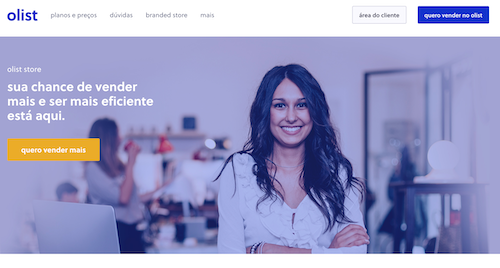

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, date
import geopandas
from shapely.geometry import Point
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.impute import SimpleImputer
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Contexte




# Objectifs


Chargez les fichiers `olist_customers_dataset, olist_order_items_dataset, olist_geolocation_dataset, olist_sellers_dataset, olist_products_dataset, olist_orders_dataset, olist_order_reviews_dataset, olist_order_payments_dataset, product_category_name_translation` à l'aide de Pandas. Stockez les résultats du chargement dans une variable.

# Compréhension des données

In [2]:
df_customers = pd.read_csv('olist_customers_dataset.csv')
df_order_items = pd.read_csv('olist_order_items_dataset.csv')
df_geolocation = pd.read_csv('olist_geolocation_dataset.csv')
df_sellers = pd.read_csv('olist_sellers_dataset.csv')
df_products = pd.read_csv('olist_products_dataset.csv')
df_orders = pd.read_csv('olist_orders_dataset.csv')
df_order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
df_order_payments = pd.read_csv('olist_order_payments_dataset.csv')
df_product_category_name_translation = pd.read_csv(
    'product_category_name_translation.csv')

## Geolocation

In [3]:
df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [4]:
df_geolocation.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [5]:
df_geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [6]:
df_geolocation = df_geolocation[[
    'geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']]

In [7]:
#df_geolocation = df_geolocation.drop_duplicates(keep='first')

In [8]:
# Create a geometry column by constructing Point objects from the lon and lat columns
#df_geolocation['geometry'] = df_geolocation.apply(lambda row: Point(row['geolocation_lng'], row['geolocation_lat']), axis=1)

In [9]:
# Create a GeoDataFrame from the DataFrame
#df_geolocation = geopandas.GeoDataFrame(df_geolocation, geometry='geometry')

In [10]:
#world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
#fig, ax = plt.subplots()
#world.plot(ax=ax, color='white', edgecolor='black')
#df_geolocation.plot(ax=ax, column = "geometry")
#fig.set_size_inches(18, 10)
#plt.show()

### Brazil

Coordonnées du Brésil
* 5°16'20" Nord à 33°44'32" Sud de latitude
* 34°47'30" Ouest à 73°59'32" Ouest de longitude

In [11]:
# Brazils most Northern spot is at 5 deg 16′ 27.8″ N latitude
#df_geolocation = df_geolocation[df_geolocation.geolocation_lat <= 5.1620]

# It’s most southern spot is at 33 deg, 45′ 04.21″ S Latitude
#df_geolocation = df_geolocation[df_geolocation.geolocation_lat >= -33.4432]

# it’s most Western spot is at 73 deg, 58′ 58.19″W Long
#df_geolocation = df_geolocation[df_geolocation.geolocation_lng >= -73.5932]

# It’s most Eastern spot is 34 deg, 47′ 35.33″ W Long.
#df_geolocation = df_geolocation[df_geolocation.geolocation_lng <= -34.4730]

In [12]:
#world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
#south_america = world[(world.continent == 'South America')]
#fig, ax = plt.subplots()
#south_america.plot(ax=ax, color='white', edgecolor='black')
#df_geolocation.plot(ax=ax, column = "geometry")
#fig.set_size_inches(18, 10)
#plt.show()

In [13]:
df_geolocation.head(3)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,1037,-23.545621,-46.639292
1,1046,-23.546081,-46.644820
2,1046,-23.546129,-46.642951


In [14]:
#df_geolocation.drop(['geolocation_lat', 'geolocation_lng'],axis=1,inplace=True)

In [15]:
#df_geolocation.to_csv('olist_geolocation_geometry.csv', index=False, header=True)

In [16]:
df_geo = pd.read_csv('olist_geolocation_geometry.csv')

In [17]:
# list zip_code_prefix  in brazil
brazil_zip_code = df_geo['geolocation_zip_code_prefix'].value_counts(
).index.tolist()

## Customers

In [18]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [19]:
df_customers.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [20]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [21]:
df_customers.shape

(99441, 5)

### Customers city

In [22]:
print(f"Il y a un total de {len(df_customers['customer_city'].value_counts())} de villes clients")

Il y a un total de 4119 de villes clients


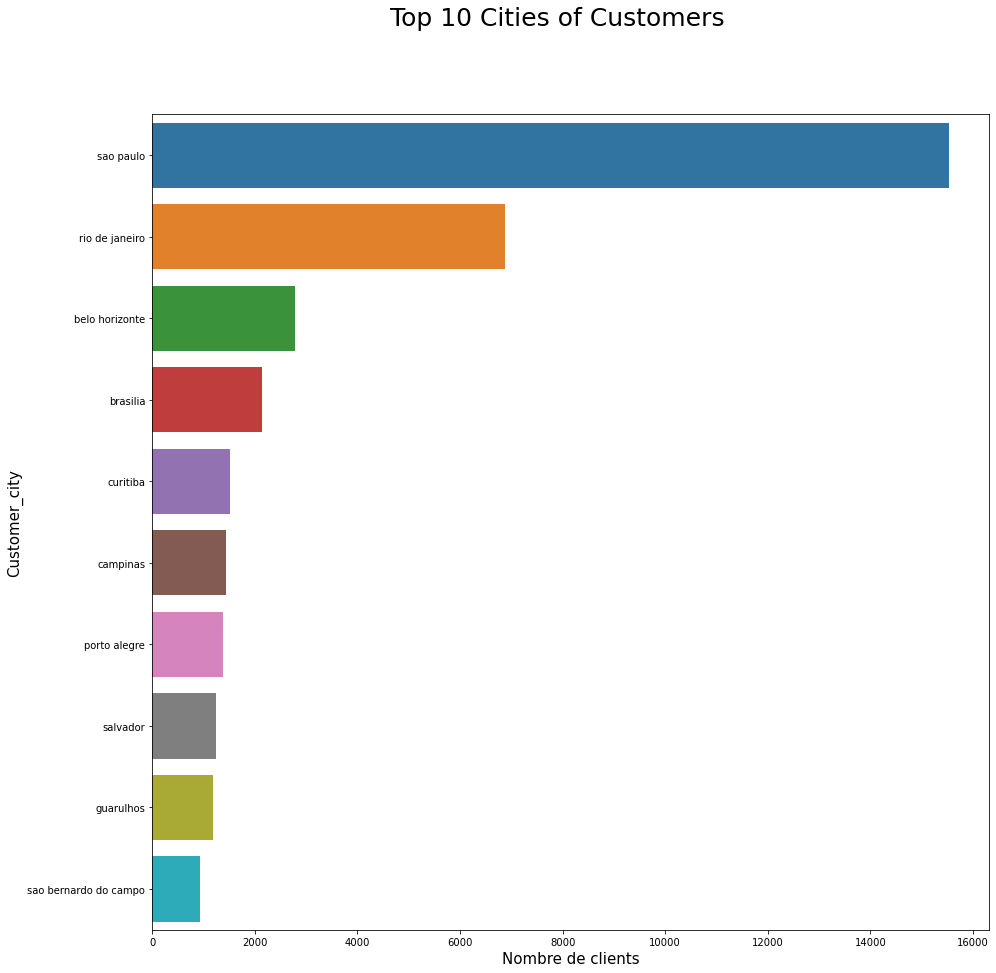

In [23]:
plt.figure(figsize=(15, 15))
sns.countplot(y=df_customers['customer_city'], data=df_customers,
              order=df_customers['customer_city'].value_counts().iloc[:10].index)
plt.suptitle("Top 10 Cities of Customers", fontsize=25)
plt.xlabel("Nombre de clients", fontsize=15)
plt.ylabel('Customer_city', fontsize=15)
plt.show()

prédominance des clients de Sao Paulo

### Customer_state

In [24]:
print(f"Il y a un total de {len(df_customers['customer_state'].value_counts())} d'Etat clients")

Il y a un total de 27 d'Etat clients


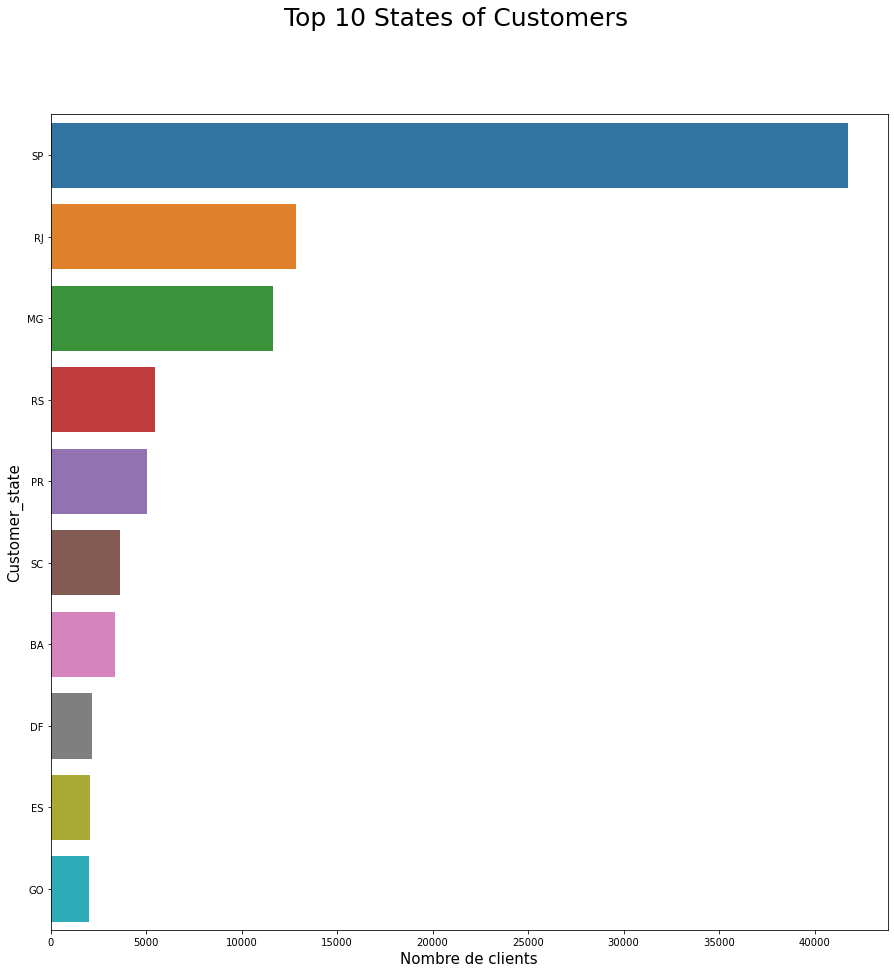

In [25]:
plt.figure(figsize=(15, 15))
sns.countplot(y=df_customers['customer_state'], data=df_customers,
              order=df_customers['customer_state'].value_counts().iloc[:10].index)
plt.suptitle("Top 10 States of Customers", fontsize=25)
plt.xlabel("Nombre de clients", fontsize=15)
plt.ylabel('Customer_state', fontsize=15)
plt.show()

prédominance des clients de SP

### Geolocalisation Brazil

In [26]:
df_customers.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

In [27]:
# isin brazil zip code
df_customers = df_customers[df_customers['customer_zip_code_prefix'].isin(
    brazil_zip_code)]

In [28]:
df_customers.nunique()

customer_id                 99157
customer_unique_id          95823
customer_zip_code_prefix    14835
customer_city                4072
customer_state                 27
dtype: int64

### zip_code_prefix  in brazil

In [29]:
# on stock dans brazil customer les clients avec un code postal au bresil
brazil_customer = df_customers['customer_id'].value_counts(
).index.tolist()

### Drop Features

In [30]:
df_customers.drop(['customer_city', 'customer_state'], axis=1, inplace=True)

## Orders

In [31]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [32]:
df_orders.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,8cf765eeef8f04ca929a1cf64ffa2584,3c8735c5a045fb31f956e4ab8f23c566,delivered,2018-02-19 15:37:47,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [33]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


### To datetime

In [34]:
# To datetime au lieu d'object
df_orders.order_purchase_timestamp  = pd.to_datetime(df_orders.order_purchase_timestamp)

# To datetime au lieu d'object
df_orders.order_approved_at  = pd.to_datetime(df_orders.order_approved_at)

# To datetime au lieu d'object
df_orders.order_delivered_carrier_date  = pd.to_datetime(df_orders.order_delivered_carrier_date)

# To datetime au lieu d'object
df_orders.order_delivered_customer_date  = pd.to_datetime(df_orders.order_delivered_customer_date)

# To datetime au lieu d'object
df_orders.order_estimated_delivery_date   = pd.to_datetime(df_orders.order_estimated_delivery_date )

### Order_status	

In [35]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [36]:
df_orders['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

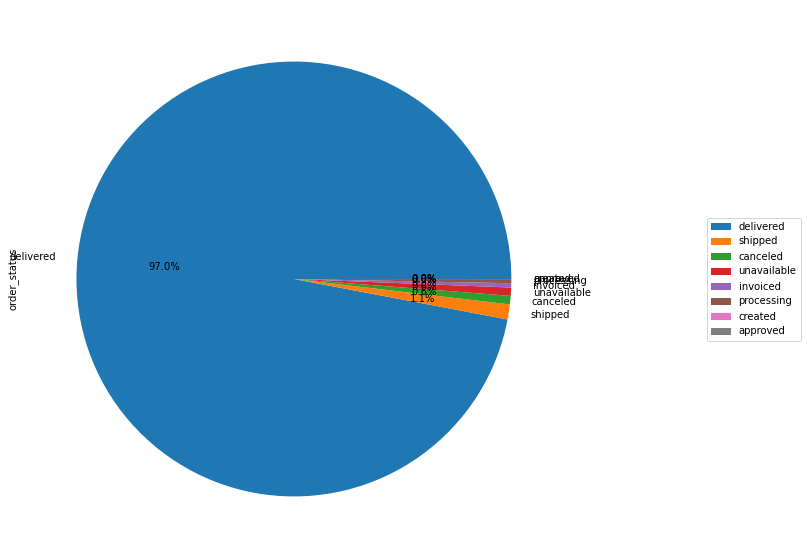

In [37]:
counts = df_orders['order_status'].value_counts()
fig, ax = plt.subplots()
ax = counts.plot.pie(autopct='%.1f%%', legend=None)
ax.legend(labels=counts.index, loc='center left', bbox_to_anchor=(1.25, 0.5))
fig.set_size_inches(18, 10)
plt.show()

Notre étude porte sur la satisfaction, assurons nous de garder uniquement order_status **delivered** pour la suite de notre étude

In [38]:
#Filtre sur delivered
df_orders = df_orders[df_orders['order_status'] == 'delivered']

In [39]:
# On drop order_status, celui ci ne comptient plus que les clients delivered
df_orders.drop(['order_status'],axis=1, inplace=True)

### Date time Selection 2017 & 2018

In [40]:
# Set_index
df_orders = df_orders.set_index(
    'order_delivered_customer_date')

In [41]:
# Visulation resample Jour du 1 janvier 2017 au 31 décembre 2018
df_orders= df_orders.loc[
    '2017-01-01':'2018-12-31']

In [42]:
# reset_index
df_orders = df_orders.reset_index()

### Order_date 

Suite à notre analyse, nous pouvons observer un nombre signification de données abérantes, sur les dates. Nous informons les équipes pour s'assurer de la synchronsation des nos données temporelles et du process en place, une hypothese est possible 

**vérification des données**
* df_orders['order_delivered_customer_date'] < df_orders['order_delivered_carrier_date']

La date du transporteur de la commande et la date de livraison de la commande au client 

In [43]:
val_diff = df_orders.loc[(df_orders['order_delivered_customer_date']
                          < df_orders['order_delivered_customer_date'])]

In [44]:
# Affichage avec la fonction print()
print(
    f'Il y a  {len(val_diff)} commandes ayant un écart entre La date du transporteur de la commande et la date de livraison de la commande au client ')

Il y a  0 commandes ayant un écart entre La date du transporteur de la commande et la date de livraison de la commande au client 


* df_orders['order_delivered_customer_date'] < df_orders['order_approved_at']

La date de livraison de la commande au client  et le fait que la commande soit approuvée

In [45]:
val_diff = df_orders.loc[(df_orders['order_delivered_customer_date']
                          < df_orders['order_approved_at'])]

In [46]:
# Affichage avec la fonction print()
print(
    f'Il y a  {len(val_diff)} commandes ayant un écart entre la date de livraison de la commande au client  et le fait que la commande soit approuvée ')

Il y a  61 commandes ayant un écart entre la date de livraison de la commande au client  et le fait que la commande soit approuvée 


In [47]:
# On élimine ces données abérantes
df_orders = df_orders.loc[(df_orders['order_delivered_customer_date']
                           >= df_orders['order_approved_at'])]

* df_orders['order_delivered_carrier_date'] < df_orders['order_approved_at']

La date du transporteur de la commande et le fait que la commande soit approuvée

In [48]:
val_diff = df_orders.loc[(df_orders['order_delivered_customer_date']
                          < df_orders['order_delivered_customer_date'])]

In [49]:
# Affichage avec la fonction print()
print(
    f'Il y a  {len(val_diff)} commandes ayant un écart entre la date de livraison de la commande au client  et le fait que la commande soit approuvée ')

Il y a  0 commandes ayant un écart entre la date de livraison de la commande au client  et le fait que la commande soit approuvée 


* df_orders['order_estimated_delivery_date'] < df_orders['order_delivered_carrier_date'])

Entre la date d'estimation d'arrivée et la date du transporteur de la commande

In [50]:
val_diff = df_orders.loc[(df_orders['order_estimated_delivery_date']
                          < df_orders['order_delivered_carrier_date'])]

In [51]:
# Affichage avec la fonction print()
print(
    f"Il y a  {len(val_diff)} commandes ayant un écart entre la date d'estimation d'arrivée et la date du transporteur de la commande")

Il y a  462 commandes ayant un écart entre la date d'estimation d'arrivée et la date du transporteur de la commande


In [52]:
# On élimine ces données abérantes
df_orders = df_orders.loc[(df_orders['order_estimated_delivery_date']
                           >= df_orders['order_delivered_carrier_date'])]

### Temps de session

In [53]:
# Création d'une feature temps de session
df_orders = df_orders.assign(temps_session=lambda x: (x['order_approved_at'] -
               x['order_purchase_timestamp']))

### Temps total ( début de session jusqu'à livraison)
correspond à l'expérience client

In [54]:
# Création d'une feature expérience client
df_orders = df_orders.assign(experience_client=lambda x: (x['order_delivered_customer_date'] -
               x['order_purchase_timestamp']))

### Temps de livraison estimé

In [55]:
# Création d'une feature Temps de livraison estimé
df_orders = df_orders.assign(temps_livraison_estime=lambda x: (x['order_estimated_delivery_date'] -
               x['order_approved_at']))

In [56]:
df_orders 

,order_delivered_customer_date,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_estimated_delivery_date,temps_session,experience_client,temps_livraison_estime
0,2017-10-10 21:25:13,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-18,0 days 00:10:42,8 days 10:28:40,15 days 12:52:45
1,2018-08-07 15:27:45,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-13,1 days 06:42:50,13 days 18:46:08,17 days 20:35:33
2,2018-08-17 18:06:29,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-09-04,0 days 00:16:34,9 days 09:27:40,26 days 15:04:37
3,2017-12-02 00:28:42,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-15,0 days 00:17:53,13 days 05:00:36,26 days 04:14:01
4,2018-02-16 18:17:02,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-26,0 days 01:01:50,2 days 20:58:23,12 days 01:39:31
...,...,...,...,...,...,...,...,...,...,...
96198,2017-03-17 15:08:01,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-28,0 days 00:00:00,8 days 05:13:56,18 days 14:05:55
96199,2018-02-28 17:37:56,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-03-02,0 days 00:11:39,22 days 04:38:58,23 days 10:49:23
96200,2017-09-21 11:24:17,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-27,0 days 00:17:33,24 days 20:37:34,30 days 08:55:44
96201,2018-01-25 23:32:54,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-02-15,0 days 00:07:54,17 days 02:04:27,37 days 02:23:39


### Id_customer in Brazil
Those who is in df_customers

In [57]:
# stock les customers avant application d'isin
customer_in_df_order=df_orders['customer_id']

In [58]:
# isin customers brazil 
df_orders = df_orders[df_orders['customer_id'].isin(
    brazil_customer)]

In [59]:
# Affichage avec la fonction print()
print(
    f"Il y a  {len(customer_in_df_order)-len(df_orders)} clients en moins, ceux qui n'impliquait pas des clients brésiliens")

Il y a  270 clients en moins, ceux qui n'impliquait pas des clients brésiliens


### Order_id list

In [60]:
# on peut maintenant stocker la liste des order_id dans notre df order
order_id_customer = df_orders['order_id'].value_counts(
).index.tolist()

### Drop features

In [61]:
df_orders.drop(['order_purchase_timestamp', 'order_approved_at',
               'order_delivered_carrier_date', 'order_estimated_delivery_date','order_delivered_customer_date'], axis=1, inplace=True)

## Items

In [62]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [63]:
df_order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [64]:
df_order_items.shape

(112650, 7)

In [65]:
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [66]:
df_order_items.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

### Shipping_limit_date To datetime
date limite d'expédition

In [67]:
# To datetime au lieu d'object
df_order_items.shipping_limit_date  = pd.to_datetime(df_order_items.shipping_limit_date)

In [68]:
# Set_index
df_order_items = df_order_items.set_index(
    'shipping_limit_date')

### Price   

In [69]:
df_order_items["price"].min()

0.85

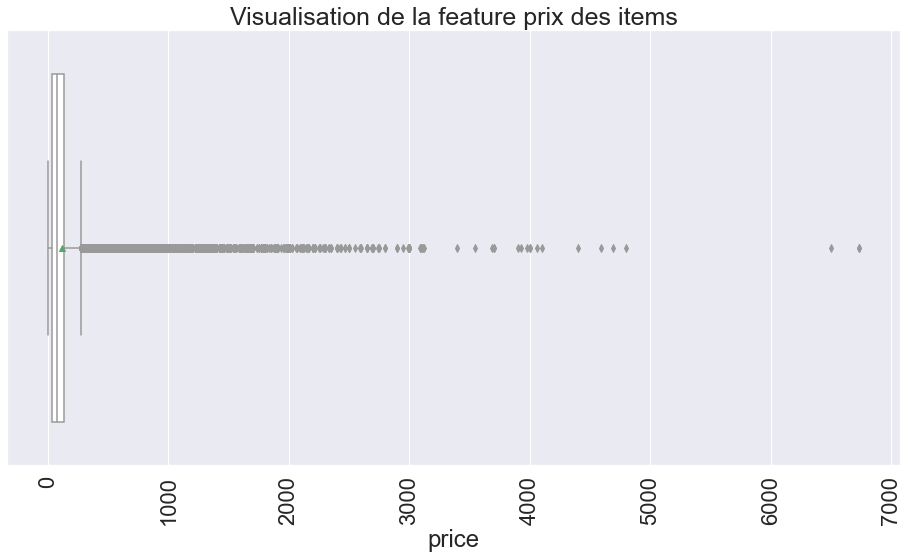

In [70]:
plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x=df_order_items["price"],
            data=df_order_items, showmeans=True, color='white')
plt.title("Visualisation de la feature prix des items", fontsize=25)
plt.xticks(rotation='90')
plt.show()

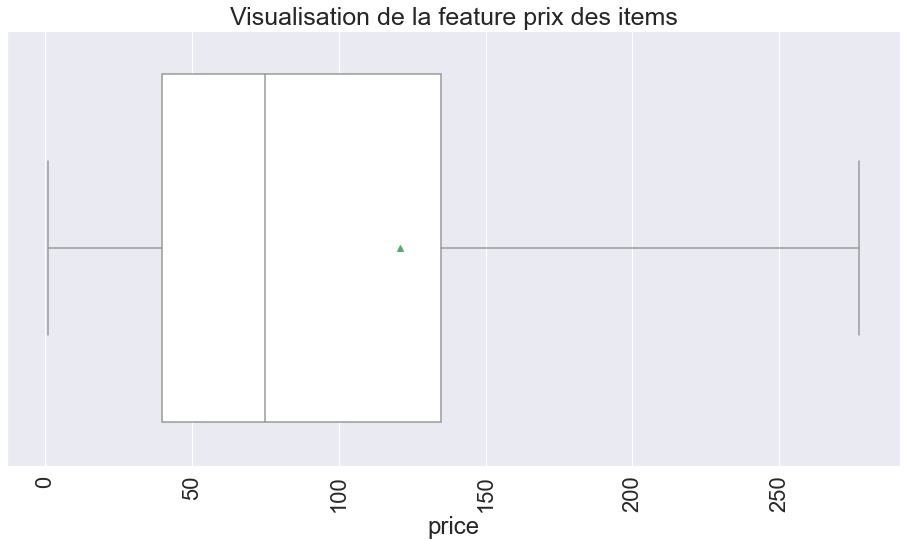

In [71]:
plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x=df_order_items["price"],
            data=df_order_items, showmeans=True, showfliers=False,color='white')
plt.title("Visualisation de la feature prix des items", fontsize=25)
plt.xticks(rotation='90')
plt.show()

In [72]:
#CA data
df_CA = df_order_items['price'].resample("M").sum()

#dataframe
df_CA = pd.DataFrame(df_CA)

# rename columns
df_CA.columns = ['CA']

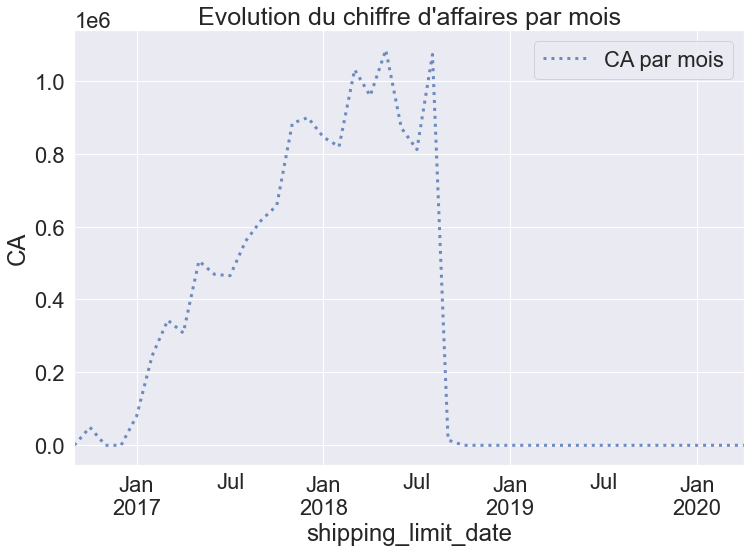

In [73]:
plt.figure(figsize=(12, 8))
df_order_items['price'].resample('M').sum().plot(
    label='CA par mois', lw=3, ls=':', alpha=0.8)
plt.ylabel("CA")
plt.title("Evolution du chiffre d'affaires par mois", fontsize=25)
plt.legend()
plt.show()

In [74]:
# Calcul du CA total
CA_total = df_order_items["price"].sum()

# Affichage CA  total avec la fonction print()
print(
    f'Le chiffre d’affaires total réalisé est de : {round(CA_total ,2)} euros')

Le chiffre d’affaires total réalisé est de : 13591643.7 euros


In [75]:
CA_2016 = df_order_items['price'].resample("Y").sum()[0]
CA_2017 = df_order_items['price'].resample("Y").sum()[1]
CA_2018 = df_order_items['price'].resample("Y").sum()[2]
CA_2019 = df_order_items['price'].resample("Y").sum()[3]
CA_2020 = df_order_items['price'].resample("Y").sum()[4]

In [76]:
# Affichage CA / annéé avec la fonction print()
print(
    f'Le chiffre d’affaires total réalisé en 2016 est de : {round(CA_2016 ,2)} euros')

print(
    f'Le chiffre d’affaires total réalisé en 2017 est de : {round(CA_2017,2)} euros')

print(
    f'Le chiffre d’affaires total réalisé en 2018 est de : {round(CA_2018 ,2)} euros')

print(
    f'Le chiffre d’affaires total réalisé en 2019 est de : {round(CA_2019 ,2)} euros')

print(
    f'Le chiffre d’affaires total réalisé en 2020 est de : {round(CA_2020 ,2)} euros')

Le chiffre d’affaires total réalisé en 2016 est de : 49785.92 euros
Le chiffre d’affaires total réalisé en 2017 est de : 6034868.58 euros
Le chiffre d’affaires total réalisé en 2018 est de : 7506643.24 euros
Le chiffre d’affaires total réalisé en 2019 est de : 0.0 euros
Le chiffre d’affaires total réalisé en 2020 est de : 345.96 euros


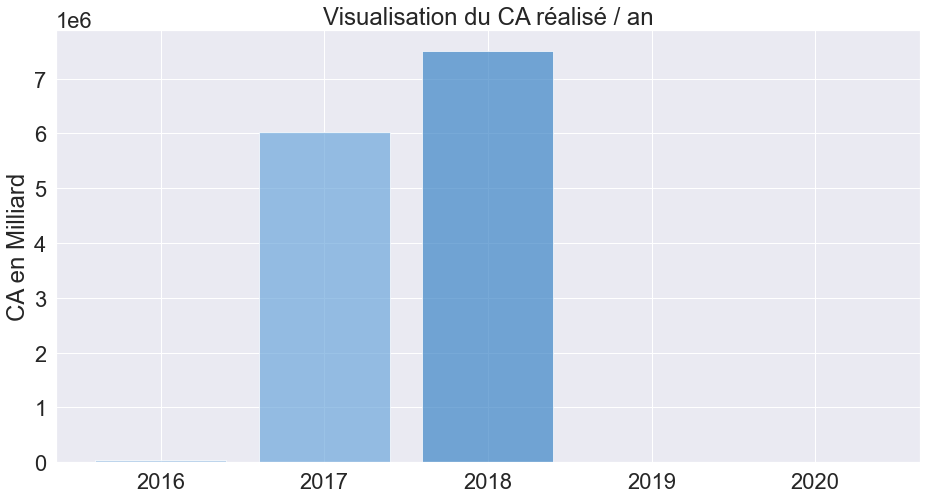

In [77]:
# visualisation avec barplot de matplotlib
fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes([0, 0, 1, 1])
labels = '2016', '2017', '2018', '2019', '2020'
data = [CA_2016, CA_2017, CA_2018, CA_2019, CA_2020]

ax.bar(labels, data, color=['#9fc5e8', '#6fa8dc', '#3d85c6','#9fc5e8', '#6fa8dc'], alpha=0.7)
ax.set_title('Visualisation du CA réalisé / an')
ax.tick_params(axis='x', labelrotation=0)
ax.set_ylabel('CA en Milliard')
plt.show()

### Freight_value  
valeur du fret

In [78]:
df_order_items["freight_value"].min()

0.0

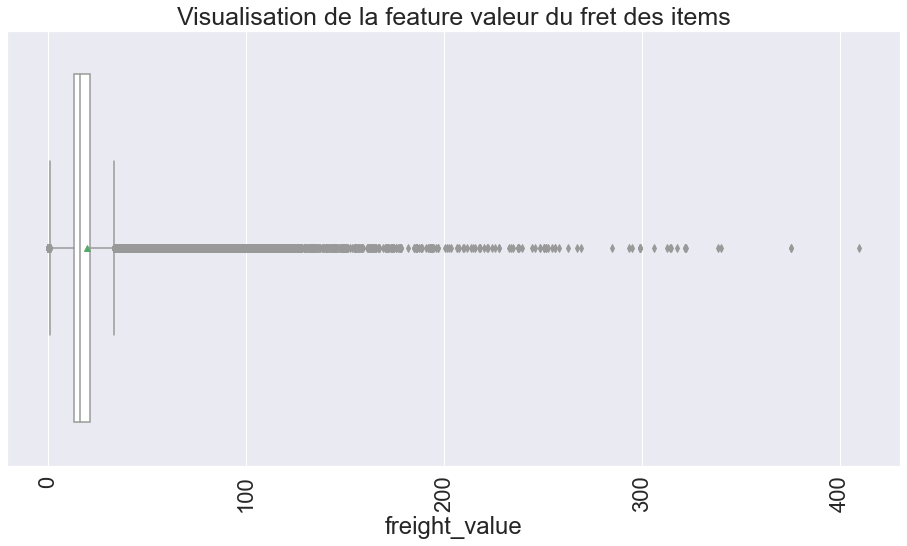

In [79]:
plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x=df_order_items["freight_value"],
            data=df_order_items, showmeans=True, color='white')
plt.title("Visualisation de la feature valeur du fret des items", fontsize=25)
plt.xticks(rotation='90')
plt.show()

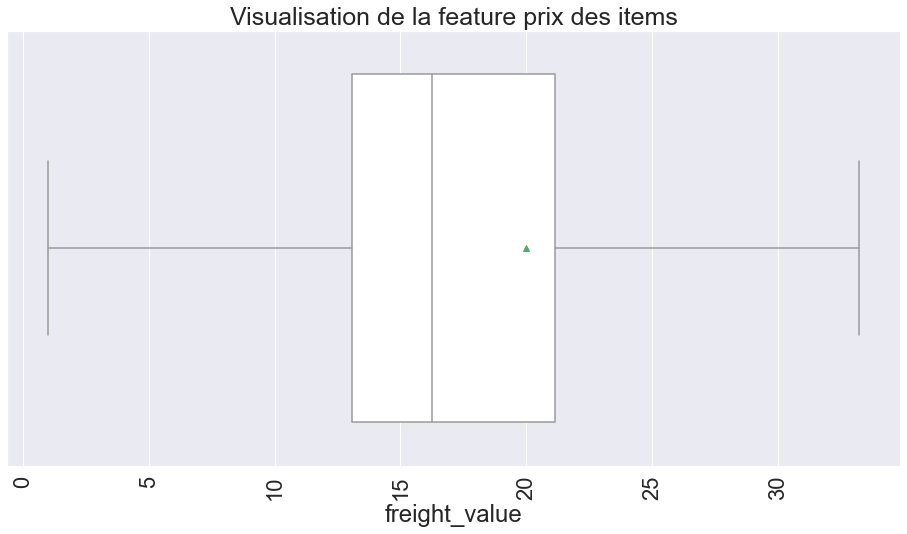

In [80]:
plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x=df_order_items["freight_value"],
            data=df_order_items, showmeans=True, showfliers=False,color='white')
plt.title("Visualisation de la feature prix des items", fontsize=25)
plt.xticks(rotation='90')
plt.show()

In [81]:
#fret data
df_fret = df_order_items['freight_value'].resample("M").sum()

#dataframe
df_fret = pd.DataFrame(df_CA)

# rename columns
df_fret.columns = ['Depense']

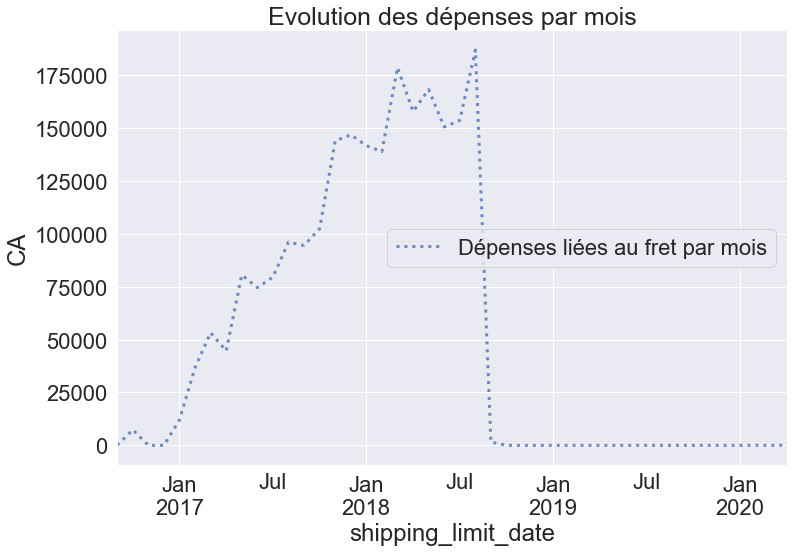

In [82]:
plt.figure(figsize=(12, 8))
df_order_items['freight_value'].resample('M').sum().plot(
    label='Dépenses liées au fret par mois', lw=3, ls=':', alpha=0.8)
plt.ylabel("CA")
plt.title("Evolution des dépenses par mois", fontsize=25)
plt.legend()
plt.show()

In [83]:
Dépenses_2016 = df_order_items['freight_value'].resample("Y").sum()[0]
Dépenses_2017 = df_order_items['freight_value'].resample("Y").sum()[1]
Dépenses_2018 = df_order_items['freight_value'].resample("Y").sum()[2]
Dépenses_2019 = df_order_items['freight_value'].resample("Y").sum()[3]
Dépenses_2020 = df_order_items['freight_value'].resample("Y").sum()[4]

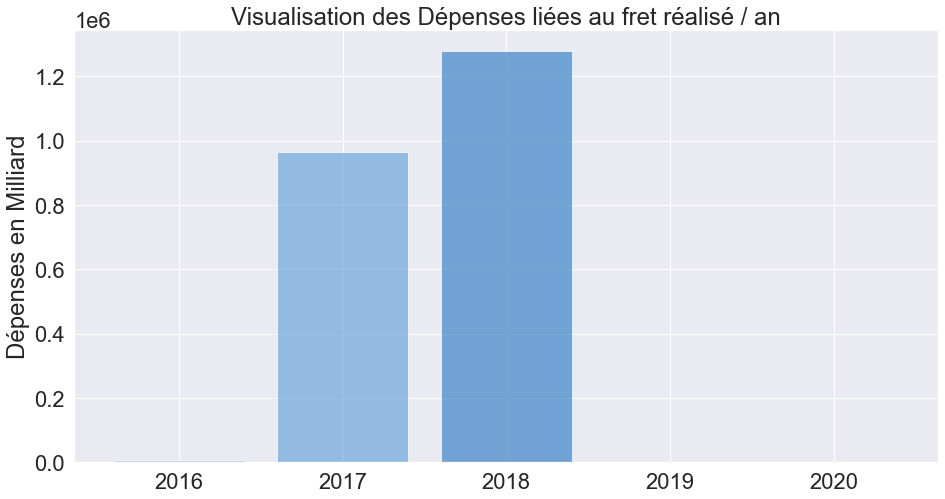

In [84]:
# visualisation avec barplot de matplotlib
fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes([0, 0, 1, 1])
labels = '2016', '2017', '2018', '2019', '2020'
data = [Dépenses_2016, Dépenses_2017, Dépenses_2018, Dépenses_2019, Dépenses_2020]

ax.bar(labels, data, color=['#9fc5e8', '#6fa8dc', '#3d85c6','#9fc5e8', '#6fa8dc'], alpha=0.7)
ax.set_title('Visualisation des Dépenses liées au fret réalisé / an')
ax.tick_params(axis='x', labelrotation=0)
ax.set_ylabel('Dépenses en Milliard')
plt.show()

In [85]:
# Calcul du dépense lié au fret
Depense_totale = df_order_items["freight_value"].sum()

# Affichage CA  total avec la fonction print()
print(
    f'La Dépense totale liée au fret est de : {round(Depense_totale ,2)} euros')

La Dépense totale liée au fret est de : 2251909.54 euros


### Price - Freight value

In [86]:
# Calcul du Bénéfice
Benefice = CA_total - Depense_totale

# Affichage CA  total avec la fonction print()
print(
    f'Le Bénéfice est de : {round(Benefice ,2)} euros')

Le Bénéfice est de : 11339734.16 euros


In [87]:
df_order_items = df_order_items.assign(benefice=lambda x: (x['price'] -
               x['freight_value']))

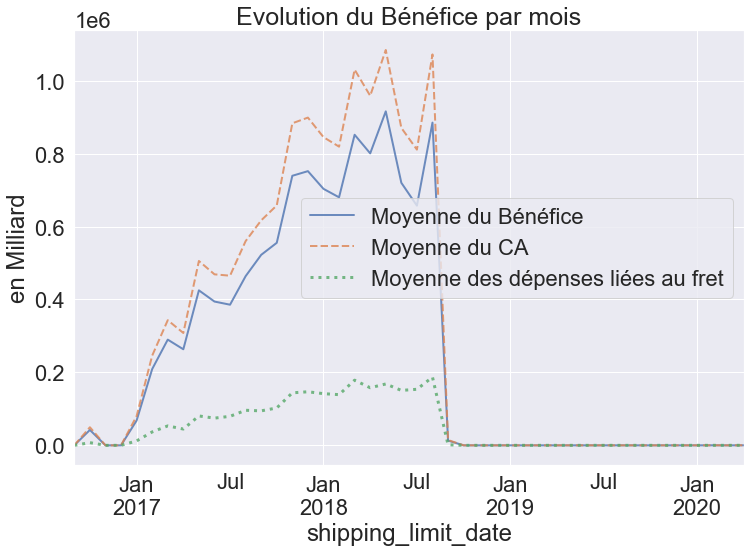

In [88]:
plt.figure(figsize=(12, 8))
df_order_items['benefice'].resample('M').sum().plot(
    label='Moyenne du Bénéfice', lw=2, ls='-', alpha=0.8)
df_order_items['price'].resample('M').sum().plot(
    label='Moyenne du CA', lw=2, ls='--', alpha=0.8)
df_order_items['freight_value'].resample('M').sum().plot(
    label='Moyenne des dépenses liées au fret', lw=3, ls=':', alpha=0.8)
plt.ylabel("en Milliard")
plt.title("Evolution du Bénéfice par mois", fontsize=25)
plt.legend()
plt.show()

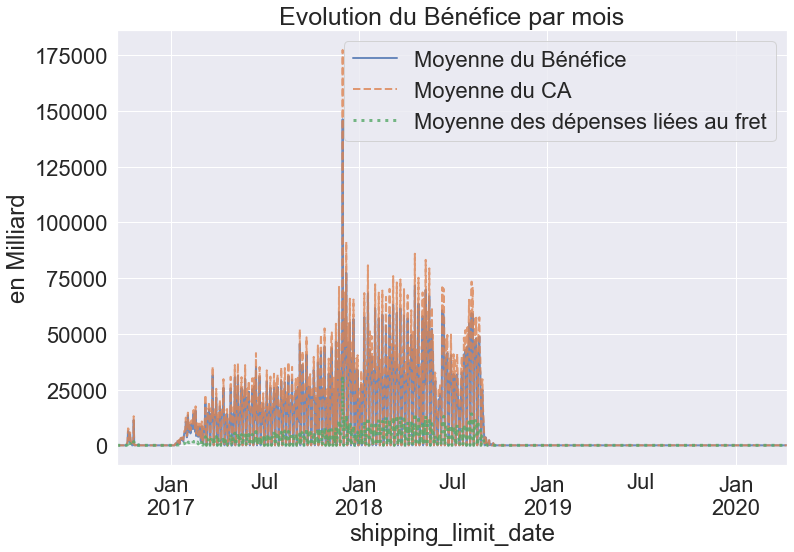

In [89]:
plt.figure(figsize=(12, 8))
df_order_items['benefice'].resample('D').sum().plot(
    label='Moyenne du Bénéfice', lw=2, ls='-', alpha=0.8)
df_order_items['price'].resample('D').sum().plot(
    label='Moyenne du CA', lw=2, ls='--', alpha=0.8)
df_order_items['freight_value'].resample('D').sum().plot(
    label='Moyenne des dépenses liées au fret', lw=3, ls=':', alpha=0.8)
plt.ylabel("en Milliard")
plt.title("Evolution du Bénéfice par mois", fontsize=25)
plt.legend()
plt.show()

### Date time Selection

Nous pouvons observer une très forte évolution du CA fin novembre 2017,Nous analyserons plus précisément par la suite les clients, les produits.
Pour le reste de notre étude, nous analyserons les donnéesuniquement entre 

In [90]:
# Visulation resample Jour du 29 septembre au 29 octobre 2021
df_order_items_loc_22_nov_22_dec_2017 = df_order_items.loc[
    '2017-11-22':'2017-12-22']

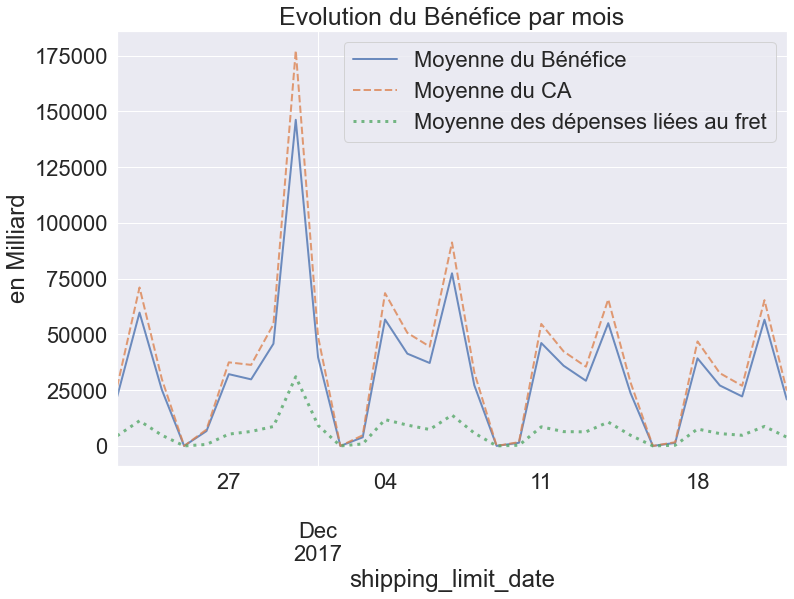

In [91]:
plt.figure(figsize=(12, 8))
df_order_items_loc_22_nov_22_dec_2017['benefice'].resample('D').sum().plot(
    label='Moyenne du Bénéfice', lw=2, ls='-', alpha=0.8)
df_order_items_loc_22_nov_22_dec_2017['price'].resample('D').sum().plot(
    label='Moyenne du CA', lw=2, ls='--', alpha=0.8)
df_order_items_loc_22_nov_22_dec_2017['freight_value'].resample('D').sum().plot(
    label='Moyenne des dépenses liées au fret', lw=3, ls=':', alpha=0.8)
plt.ylabel("en Milliard")
plt.title("Evolution du Bénéfice par mois", fontsize=25)
plt.legend()
plt.show()

### 2017 & 2018

In [92]:
# Visulation resample Jour du 1 janvier 2017 au 31 décembre 2018
df_order_items= df_order_items.loc[
    '2017-01-01':'2018-12-31']

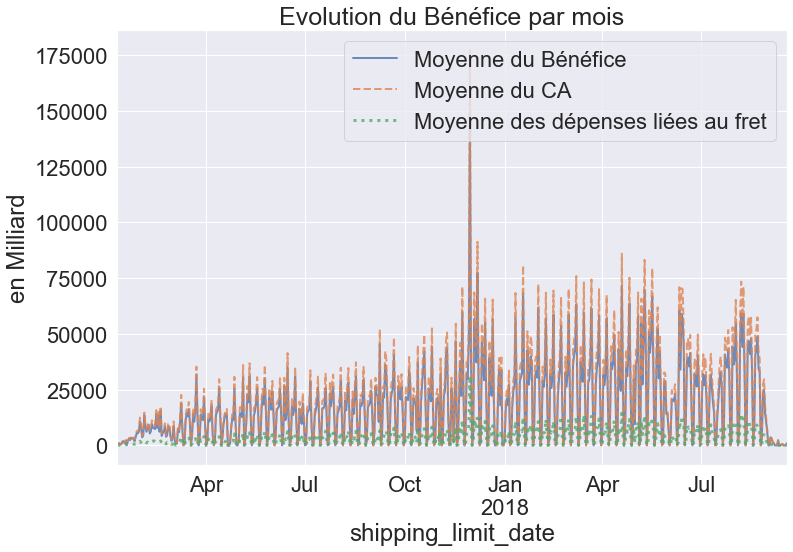

In [93]:
plt.figure(figsize=(12, 8))
df_order_items['benefice'].resample('D').sum().plot(
    label='Moyenne du Bénéfice', lw=2, ls='-', alpha=0.8)
df_order_items['price'].resample('D').sum().plot(
    label='Moyenne du CA', lw=2, ls='--', alpha=0.8)
df_order_items['freight_value'].resample('D').sum().plot(
    label='Moyenne des dépenses liées au fret', lw=3, ls=':', alpha=0.8)
plt.ylabel("en Milliard")
plt.title("Evolution du Bénéfice par mois", fontsize=25)
plt.legend()
plt.show()

### Seasonal decompose

In [94]:
# Visulation resample Jour du 1 janvier 2017 au 31 décembre 2017
df_order_items_2017= df_order_items.loc[
    '2017-01-01':'2017-12-31']

In [95]:
# Visulation resample Jour du 1 janvier 2018 au 31 décembre 2018
df_order_items_2018= df_order_items.loc[
    '2018-01-01':'2018-12-31']

<Figure size 864x432 with 0 Axes>

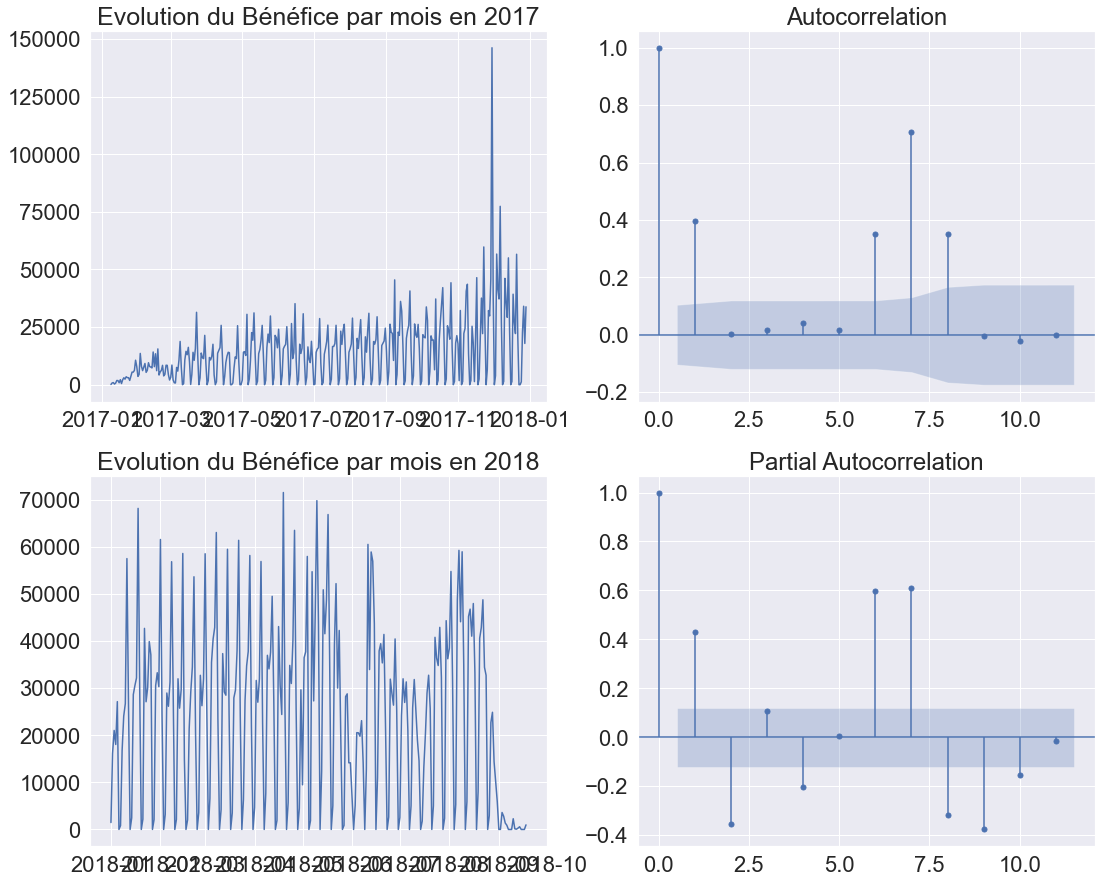

In [96]:
fig = plt.figure(figsize=(12, 6))
fig,axes=plt.subplots(2,2)
axes[0,0].plot(df_order_items_2017['benefice'].resample('D').sum())
plot_acf(df_order_items_2017['benefice'].resample('D').sum(), lags=11, ax=axes[0,1])
axes[0,0].set_title("Evolution du Bénéfice par mois en 2017", fontsize=25)
axes[1,0].plot(df_order_items_2018['benefice'].resample('D').sum())
plot_pacf(df_order_items_2018['benefice'].resample('D').sum(),lags=11, ax=axes[1,1])
axes[1,0].set_title("Evolution du Bénéfice par mois en 2018", fontsize=25)

fig.set_size_inches(18, 15)
plt.show()

#### 2017

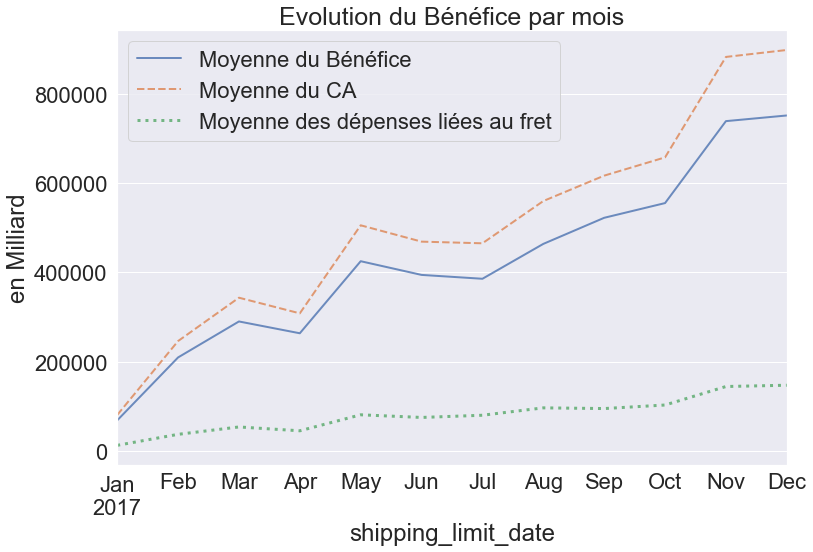

In [97]:
plt.figure(figsize=(12, 8))
df_order_items_2017['benefice'].resample('M').sum().plot(
    label='Moyenne du Bénéfice', lw=2, ls='-', alpha=0.8)
df_order_items_2017['price'].resample('M').sum().plot(
    label='Moyenne du CA', lw=2, ls='--', alpha=0.8)
df_order_items_2017['freight_value'].resample('M').sum().plot(
    label='Moyenne des dépenses liées au fret', lw=3, ls=':', alpha=0.8)
plt.ylabel("en Milliard")
plt.title("Evolution du Bénéfice par mois", fontsize=25)
plt.legend()
plt.show()

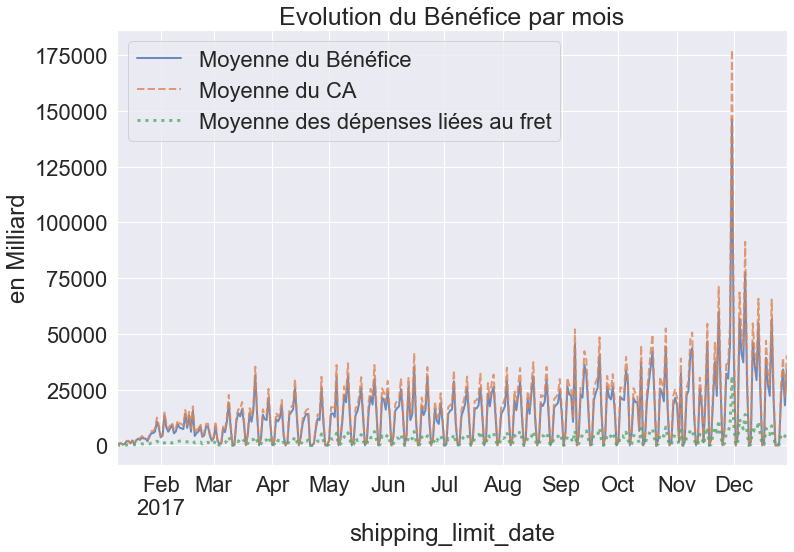

In [98]:
plt.figure(figsize=(12, 8))
df_order_items_2017['benefice'].resample('D').sum().plot(
    label='Moyenne du Bénéfice', lw=2, ls='-', alpha=0.8)
df_order_items_2017['price'].resample('D').sum().plot(
    label='Moyenne du CA', lw=2, ls='--', alpha=0.8)
df_order_items_2017['freight_value'].resample('D').sum().plot(
    label='Moyenne des dépenses liées au fret', lw=3, ls=':', alpha=0.8)
plt.ylabel("en Milliard")
plt.title("Evolution du Bénéfice par mois", fontsize=25)
plt.legend()
plt.show()

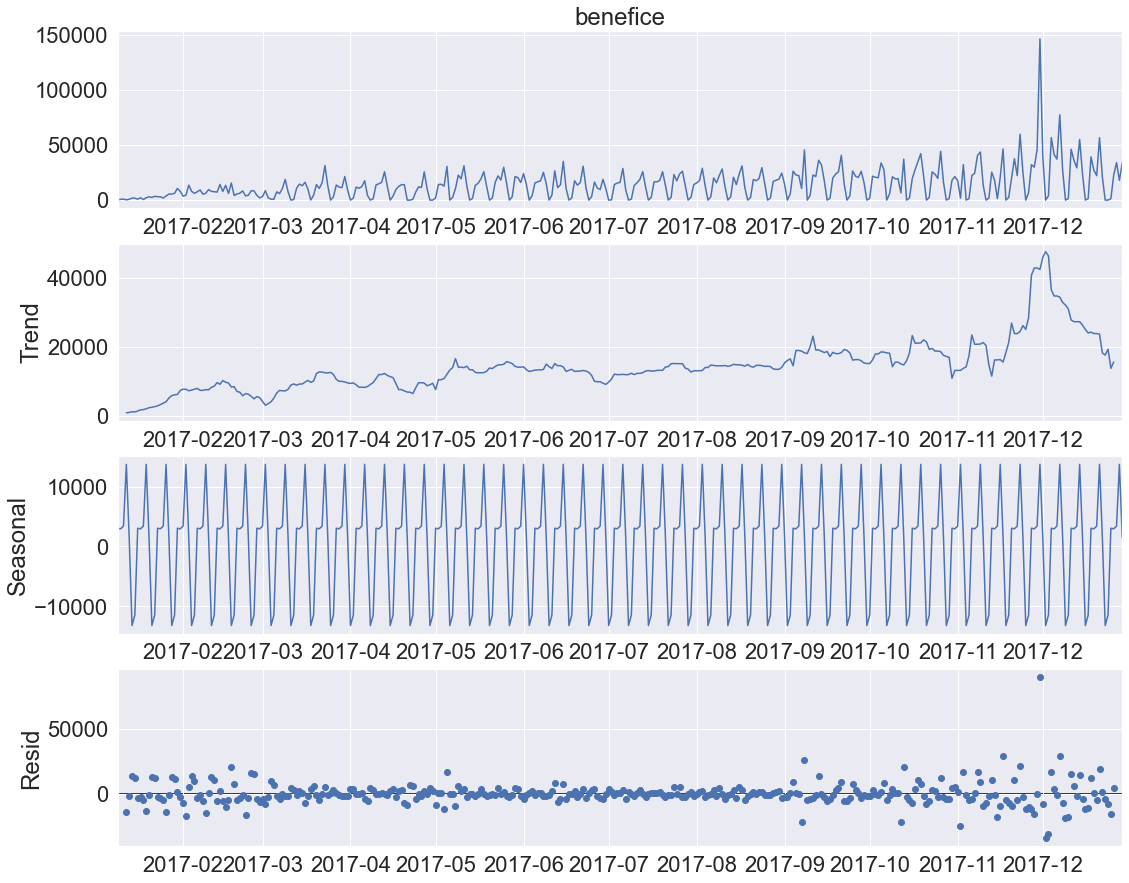

In [99]:
# Seasonal decompose
decomposition = sm.tsa.seasonal_decompose(
    df_order_items_2017['benefice'].resample('D').sum(), model='addictive')
fig = decomposition.plot()
fig.set_size_inches(18, 15)
plt.show()

#### 2018

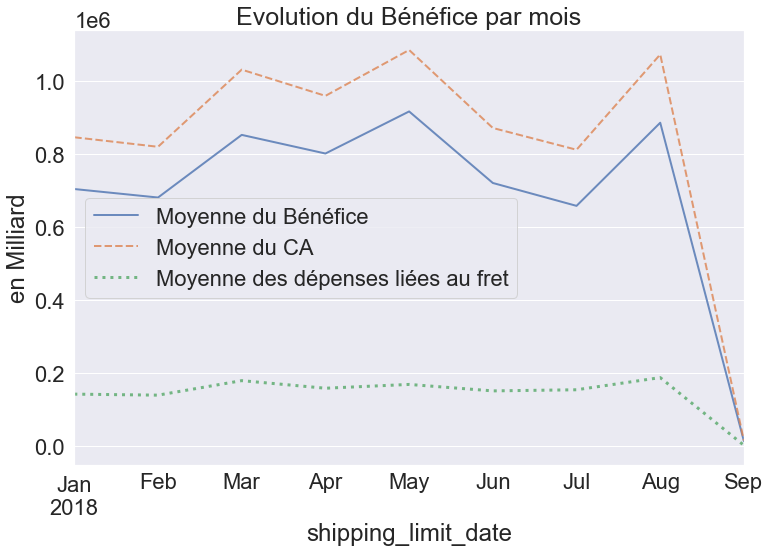

In [100]:
plt.figure(figsize=(12, 8))
df_order_items_2018['benefice'].resample('M').sum().plot(
    label='Moyenne du Bénéfice', lw=2, ls='-', alpha=0.8)
df_order_items_2018['price'].resample('M').sum().plot(
    label='Moyenne du CA', lw=2, ls='--', alpha=0.8)
df_order_items_2018['freight_value'].resample('M').sum().plot(
    label='Moyenne des dépenses liées au fret', lw=3, ls=':', alpha=0.8)
plt.ylabel("en Milliard")
plt.title("Evolution du Bénéfice par mois", fontsize=25)
plt.legend()
plt.show()

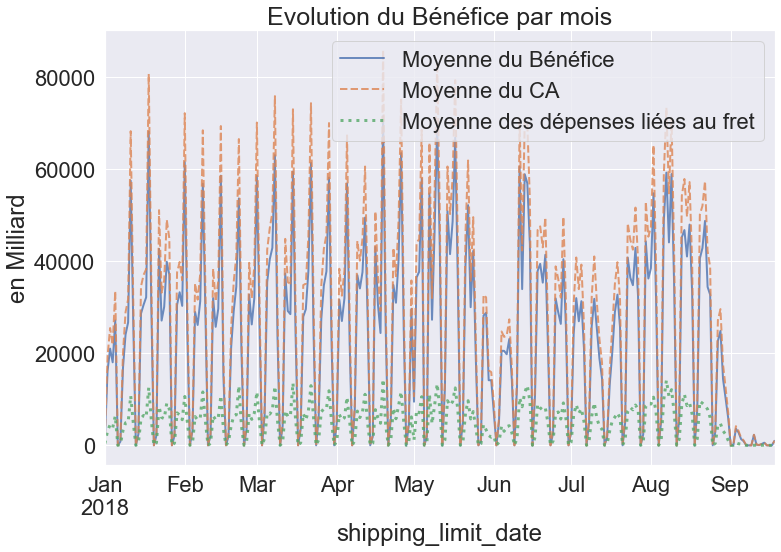

In [101]:
plt.figure(figsize=(12, 8))
df_order_items_2018['benefice'].resample('D').sum().plot(
    label='Moyenne du Bénéfice', lw=2, ls='-', alpha=0.8)
df_order_items_2018['price'].resample('D').sum().plot(
    label='Moyenne du CA', lw=2, ls='--', alpha=0.8)
df_order_items_2018['freight_value'].resample('D').sum().plot(
    label='Moyenne des dépenses liées au fret', lw=3, ls=':', alpha=0.8)
plt.ylabel("en Milliard")
plt.title("Evolution du Bénéfice par mois", fontsize=25)
plt.legend()
plt.show()

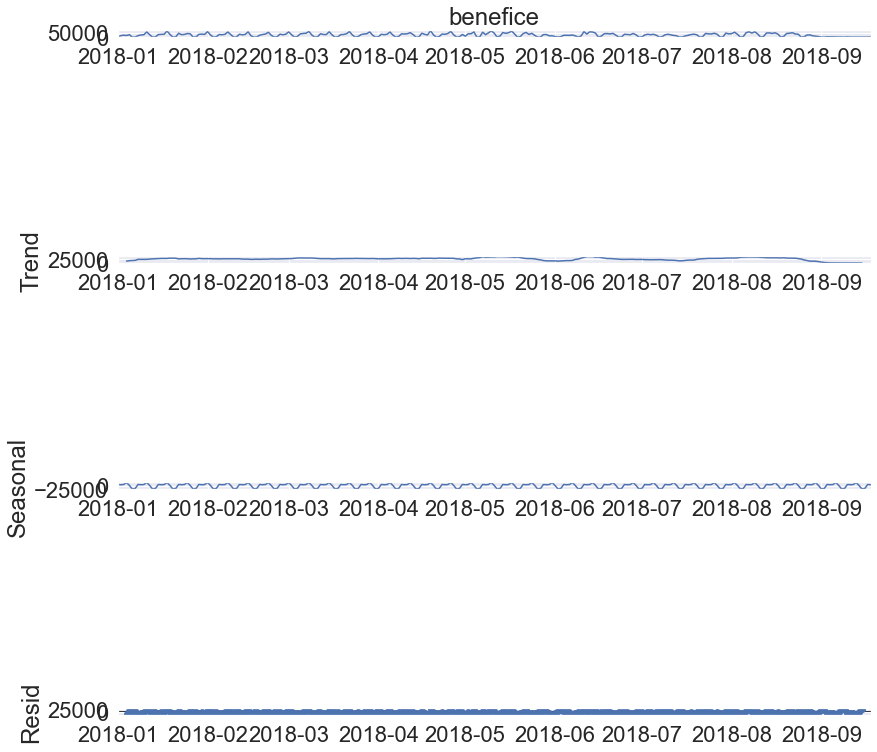

In [102]:
# Seasonal decompose
decomposition = sm.tsa.seasonal_decompose(
    df_order_items_2018['benefice'].resample('D').sum(), model='addictive')
fig = decomposition.plot()
fig.set_size_inches(18, 15)
plt.show()

### Order Id in Items

In [103]:
# stock les customers avant application d'isin
order_id_in_df_order_items=df_order_items['order_id']

In [104]:
# isin customers brazil
df_order_items = df_order_items[df_order_items['order_id'].isin(
    order_id_customer)]

In [105]:
# Affichage avec la fonction print()
print(
    f"Il y a  {len(order_id_in_df_order_items)-len(df_order_items)} de commandes en moins, ceux qui n'impliquait pas des clients brésiliens")

Il y a  3315 de commandes en moins, ceux qui n'impliquait pas des clients brésiliens


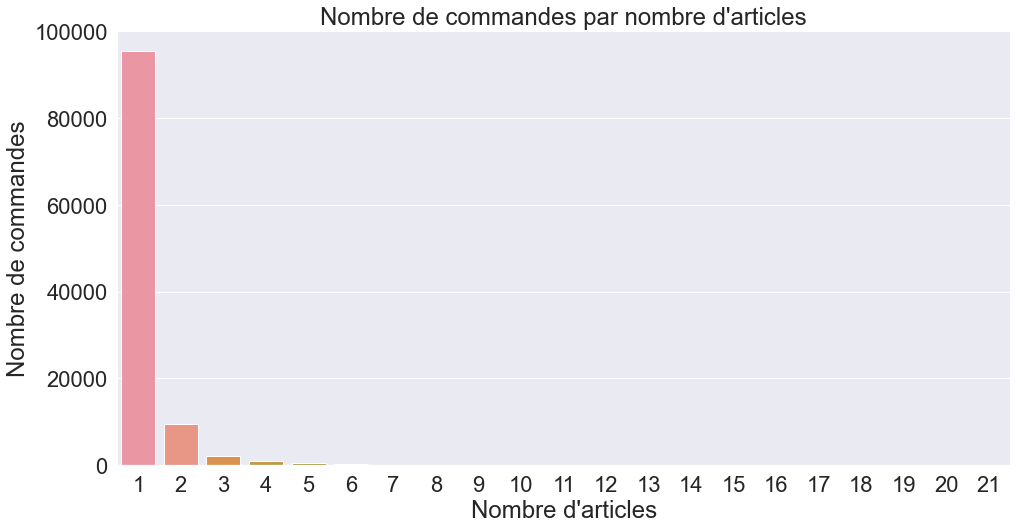

In [106]:
# Nombre d'articles dans une même commande
x = list(df_order_items["order_item_id"].value_counts().index)
y = df_order_items["order_item_id"].value_counts().values
plt.figure(figsize=[16, 8])
plt.title("Nombre de commandes par nombre d'articles")
plt.xlabel("Nombre d'articles")
plt.ylabel("Nombre de commandes")
sns.barplot(x, y)
plt.show()

Majoritairement des clients qui commande un seul article

**Hypotheses**
* Les produits sont à forte valeur technologique

* Les produits ne sont peut-être pas assez attractifs

* Les prix peuvent être trop élevés 

* Les clients peuvent ne pas avoir besoin d'acheter plusieurs articles d'un coup.

* La navigation sur votre site web peut ne pas être assez conviviale 

* Les options de livraison peuvent ne pas être suffisamment flexibles

### Drop Features

In [107]:
df_order_items = df_order_items.reset_index()

In [108]:
df_order_items.drop(['price', 'freight_value','shipping_limit_date'], axis=1, inplace=True)

## Reviews

In [109]:
df_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [110]:
df_order_reviews.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [111]:
df_order_reviews.nunique()

review_id                  98410
order_id                   98673
review_score                   5
review_comment_title        4527
review_comment_message     36159
review_creation_date         636
review_answer_timestamp    98248
dtype: int64

In [112]:
df_order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


### review_score

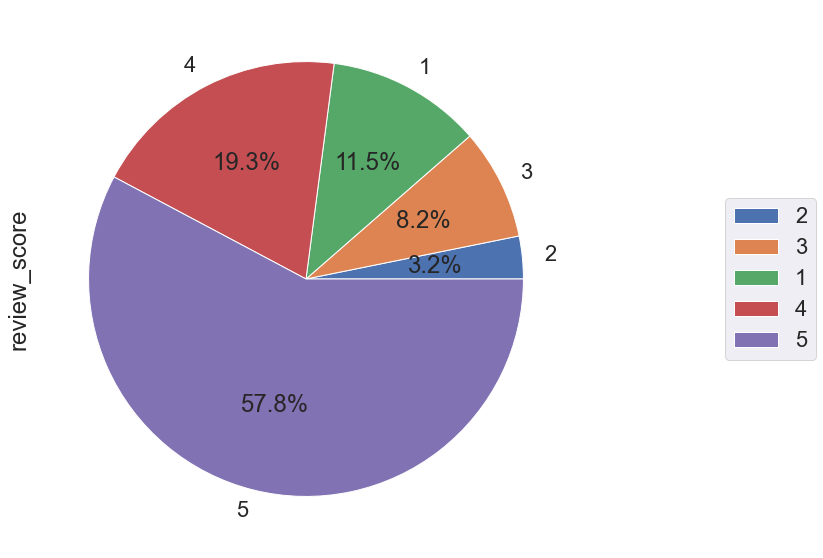

In [113]:
counts = df_order_reviews['review_score'].value_counts(ascending=True)
fig, ax = plt.subplots()
ax = counts.plot.pie(autopct='%.1f%%', legend=None)
ax.legend(labels=counts.index, loc='center left', bbox_to_anchor=(1.25, 0.5))
fig.set_size_inches(18, 10)
plt.show()

### review_creation_date To datetime

In [114]:
# To datetime au lieu d'object
df_order_reviews.review_creation_date  = pd.to_datetime(df_order_reviews.review_creation_date)

### review_answer_timestamp  To datetime

In [115]:
# To datetime au lieu d'object
df_order_reviews.review_answer_timestamp  = pd.to_datetime(df_order_reviews.review_answer_timestamp )

### Création feature temps de réponse

In [116]:
df_order_reviews['temps_de_reponse'] = (df_order_reviews['review_answer_timestamp'] -
                                        df_order_reviews['review_creation_date']).dt.total_seconds()/(24*60*60)

In [117]:
X = "temps_de_reponse"
Y = "review_score"

In [118]:
# Moyenne temps de réponse pour chaque reviews score
df_order_reviews.groupby(Y)[X].mean()

review_score
1    3.050730
2    3.004119
3    2.981170
4    3.120431
5    3.210018
Name: temps_de_reponse, dtype: float64

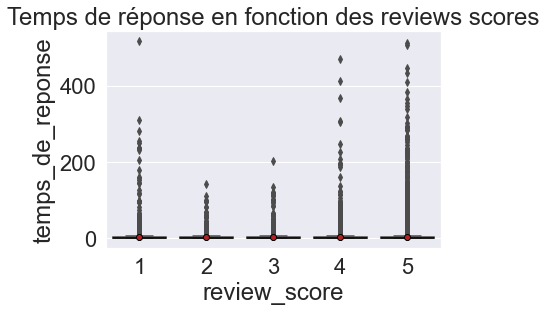

In [119]:
# Analyse graphique
medianprops = {'color': "black"}
meanprops = {'marker': 'o', 'markeredgecolor': 'black',
             'markerfacecolor': 'firebrick'}
sns.set(font_scale=2)
sns.boxplot(y=df_order_reviews[X], x=df_order_reviews[Y], showmeans=True, meanprops=meanprops,
            medianprops=medianprops).set(
    title='Temps de réponse en fonction des reviews scores')
plt.show()

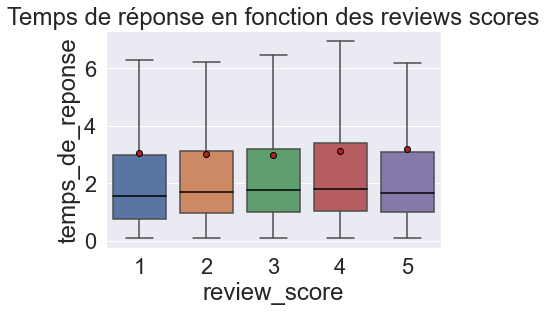

In [120]:
# Analyse graphique
medianprops = {'color': "black"}
meanprops = {'marker': 'o', 'markeredgecolor': 'black',
             'markerfacecolor': 'firebrick'}
sns.set(font_scale=2)
sns.boxplot(y=df_order_reviews[X], x=df_order_reviews[Y], showmeans=True, showfliers=False,meanprops=meanprops,
            medianprops=medianprops).set(
    title='Temps de réponse en fonction des reviews scores')
plt.show()

In [121]:
# Set_index
df_order_reviews = df_order_reviews.set_index(
    'review_creation_date')

In [122]:
# Selection du 1 janvier 2017 au 31 décembre 2018
df_order_reviews= df_order_reviews.loc[
    '2017-01-01':'2018-12-31']

In [123]:
# pour chaque review_score

df_order_reviews_review_1 = df_order_reviews[
    df_order_reviews['review_score'] == 1]

df_order_reviews_review_2 = df_order_reviews[
    df_order_reviews['review_score'] == 2]

df_order_reviews_review_3 = df_order_reviews[
    df_order_reviews['review_score'] == 3]

df_order_reviews_review_4 = df_order_reviews[
    df_order_reviews['review_score'] == 4]

df_order_reviews_review_5 = df_order_reviews[
    df_order_reviews['review_score'] == 5]


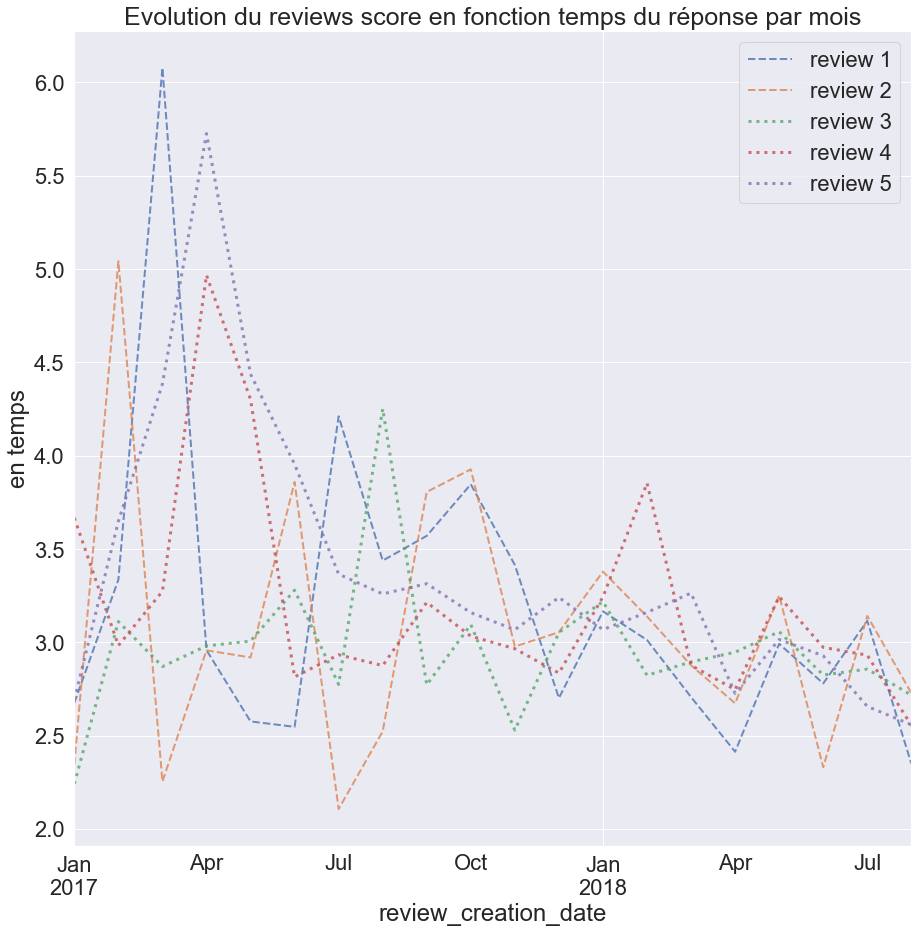

In [124]:
plt.figure(figsize=(15, 15))
df_order_reviews_review_1['temps_de_reponse'].resample('M').mean().plot(
    label='review 1', lw=2, ls='--', alpha=0.8)

df_order_reviews_review_2['temps_de_reponse'].resample('M').mean().plot(
    label='review 2', lw=2, ls='--', alpha=0.8)

df_order_reviews_review_3['temps_de_reponse'].resample('M').mean().plot(
    label='review 3', lw=3, ls=':', alpha=0.8)

df_order_reviews_review_4['temps_de_reponse'].resample('M').mean().plot(
    label='review 4', lw=3, ls=':', alpha=0.8)

df_order_reviews_review_5['temps_de_reponse'].resample('M').mean().plot(
    label='review 5', lw=3, ls=':', alpha=0.8)

plt.ylabel("en temps")
plt.title("Evolution du reviews score en fonction temps du réponse par mois", fontsize=25)
plt.legend()
plt.show()

**Commentaires**
* Range comprise entre 2 et 6 jours en moyenne
* La tendance va à la diminuation des délais de réponse au cours du temps
* Nous n'observons pas d'écart majeur en fonction du review score néanmoins les delai plus courts sont atteint par les moins bonnes reviews

### Review_comment_message
Analyse de la longueur du message de chaque commentaire

In [125]:
df_order_reviews['review_comment_message'] = df_order_reviews['review_comment_message'].fillna(
    0)

In [126]:
df_order_reviews['review_comment_message'] = df_order_reviews['review_comment_message'].astype(str)

In [127]:
def get_message_length(comment):
    return len(comment)


df_order_reviews['longueur_comment_message'] = df_order_reviews['review_comment_message'].apply(
    get_message_length)

In [128]:
df_order_reviews['review_comment_message'].replace(1, np.nan, inplace=True)

In [129]:
X = "longueur_comment_message"
Y = "review_score"

In [130]:
df_order_reviews.groupby(Y)[X].mean()

review_score
1    76.414697
2    66.207445
3    36.709575
4    19.868105
5    19.177185
Name: longueur_comment_message, dtype: float64

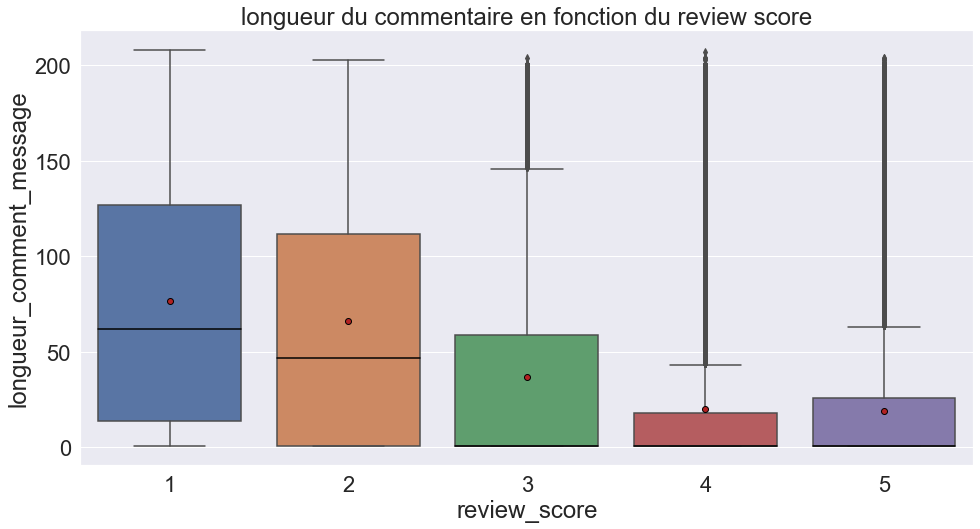

In [131]:
# Analyse graphique
medianprops = {'color': "black"}
meanprops = {'marker': 'o', 'markeredgecolor': 'black',
             'markerfacecolor': 'firebrick'}
plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(y=df_order_reviews[X], x=df_order_reviews[Y], showmeans=True, meanprops=meanprops,
            medianprops=medianprops).set(
    title='longueur du commentaire en fonction du review score')
plt.show()

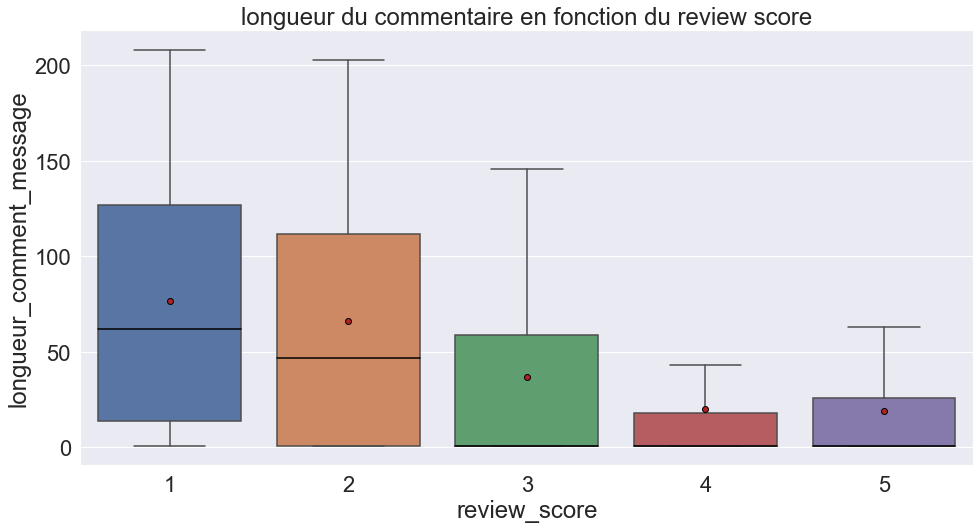

In [132]:
# Analyse graphique
medianprops = {'color': "black"}
meanprops = {'marker': 'o', 'markeredgecolor': 'black',
             'markerfacecolor': 'firebrick'}
plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(y=df_order_reviews[X], x=df_order_reviews[Y], showmeans=True,showfliers=False, meanprops=meanprops,
            medianprops=medianprops).set(
    title='longueur du commentaire en fonction du review score')
plt.show()

**Commentaires**
* La longueur du commentaire semblent plus importante pour les reviews 1 et 2
* La longueur du commentaire 4 semble la plus faible sur l'ensemble de notre dataset

### Drop Features

In [133]:
df_order_reviews = df_order_reviews.reset_index()

In [134]:
#les total de data pour chaque feature et le pourcentage de missing value
total = df_order_reviews.isnull().sum().sort_values(ascending=False)
percent = (df_order_reviews.isnull().sum()/df_order_reviews.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
review_comment_title,87331,0.883032
review_creation_date,0,0.000000
review_id,0,0.000000
order_id,0,0.000000
review_score,0,0.000000
review_comment_message,0,0.000000
review_answer_timestamp,0,0.000000
temps_de_reponse,0,0.000000
longueur_comment_message,0,0.000000


In [135]:
df_order_reviews.columns

Index(['review_creation_date', 'review_id', 'order_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_answer_timestamp', 'temps_de_reponse',
       'longueur_comment_message'],
      dtype='object')

In [136]:
df_order_reviews.drop(['review_creation_date', 'review_id',
       'review_comment_title', 'review_comment_message',
       'review_answer_timestamp'],axis=1, inplace=True)

## Payments

In [137]:
df_order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [138]:
df_order_payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [139]:
df_order_payments.shape

(103886, 5)

In [140]:
df_order_payments.nunique()

order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64

### Payment_type

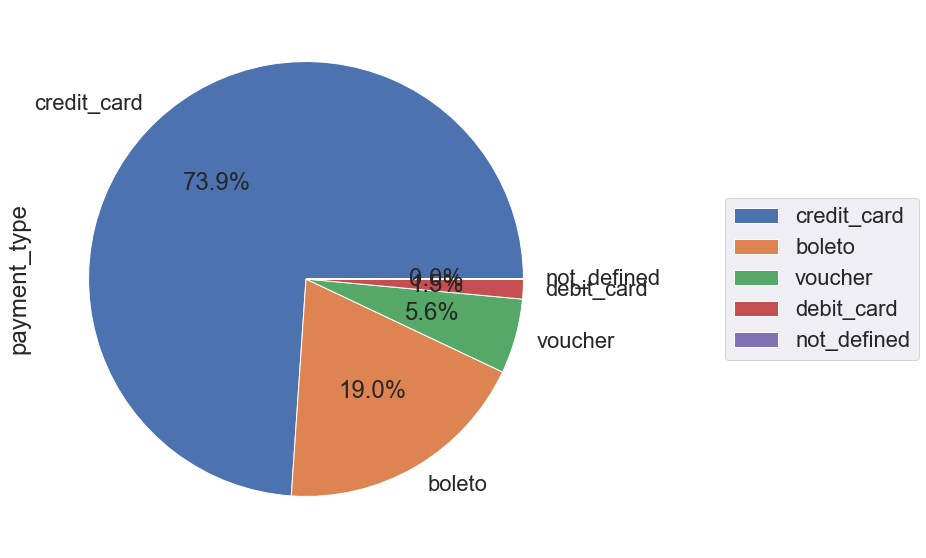

In [141]:
counts = df_order_payments['payment_type'].value_counts()
fig, ax = plt.subplots()
ax = counts.plot.pie(autopct='%.1f%%', legend=None)
ax.legend(labels=counts.index, loc='center left', bbox_to_anchor=(1.25, 0.5))
fig.set_size_inches(18, 10)
plt.show()

Nous retirons de notre jeu de données , les rows avec un payments type **'not_defined'**

In [142]:
type_payment = ['credit_card',
                'boleto',
                'voucher',
                'debit_card']

In [143]:
df_order_payments = df_order_payments[df_order_payments['payment_type'].isin(
    type_payment)]

### Payment_value 

In [144]:
X = "payment_value"
Y = "payment_type"

In [145]:
# Moyenne du payement value pour chaque payment type
df_order_payments.groupby(Y)[X].mean()

payment_type
boleto         145.034435
credit_card    163.319021
debit_card     142.570170
voucher         65.703354
Name: payment_value, dtype: float64

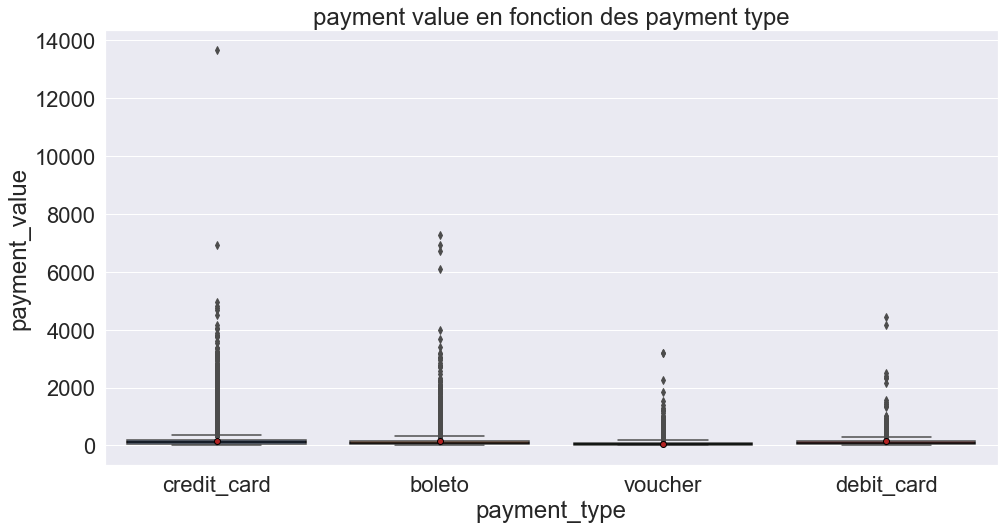

In [146]:
# Analyse graphique
medianprops = {'color': "black"}
meanprops = {'marker': 'o', 'markeredgecolor': 'black',
             'markerfacecolor': 'firebrick'}
plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(y=df_order_payments[X], x=df_order_payments[Y], showmeans=True, meanprops=meanprops,
            medianprops=medianprops).set(
    title='payment value en fonction des payment type')
plt.show()

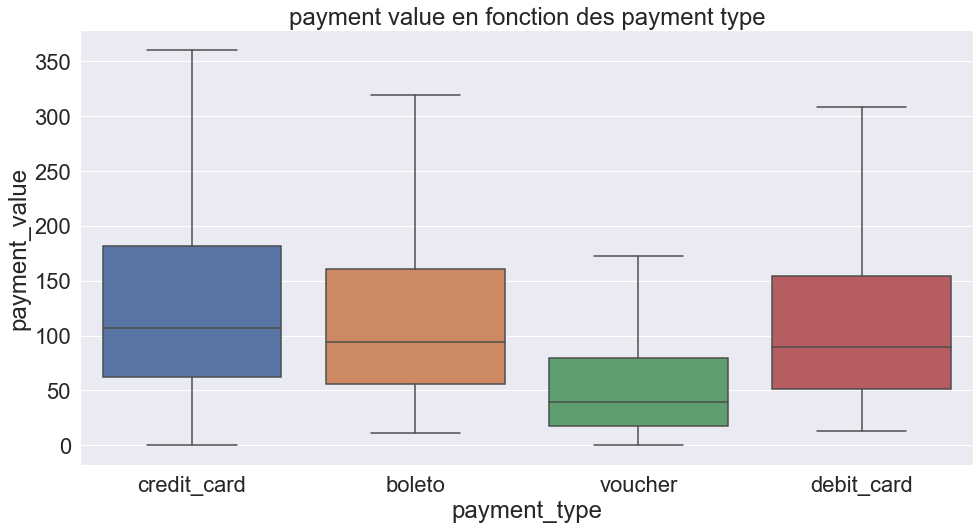

In [147]:
# Boxplot pour chaque type de paiement
plt.figure(figsize=[16, 8])
plt.title("payment value en fonction des payment type")
sns.boxplot(data=df_order_payments, y="payment_value",
            x="payment_type", showfliers=False)
plt.show()

**Commentaires**
* Il semble que les plus gros montant se font par credit card
* Les montants les plus faibles semblent se faire par voucher

### Payment_installments

Payment_installments pourrait signifier que l'acheteur a la possibilité de payer en plusieurs versements réguliers, par exemple mensuels, pour un montant total plus important.

In [148]:
X = "payment_installments"
Y = "payment_type"

In [149]:
df_order_payments.groupby(Y)[X].mean()

payment_type
boleto         1.000000
credit_card    3.507155
debit_card     1.000000
voucher        1.000000
Name: payment_installments, dtype: float64

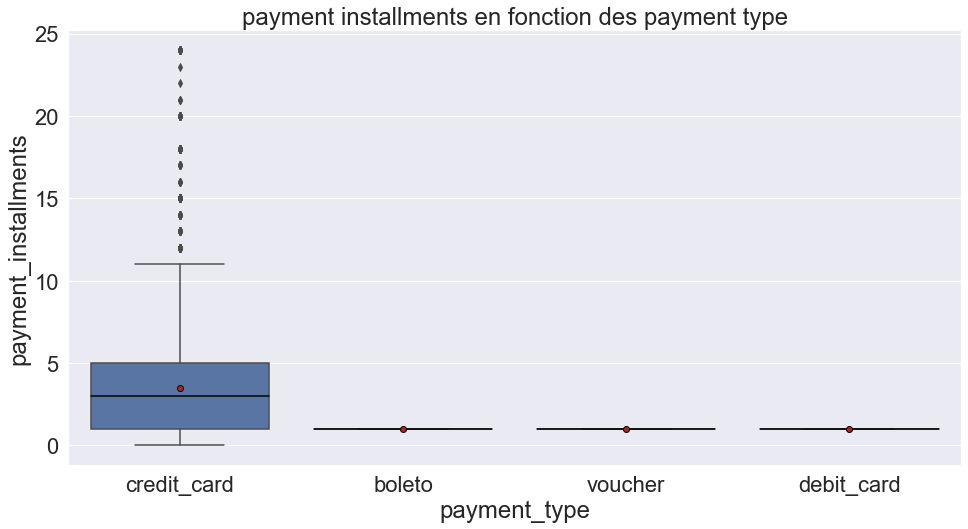

In [150]:
# Analyse graphique
medianprops = {'color': "black"}
meanprops = {'marker': 'o', 'markeredgecolor': 'black',
             'markerfacecolor': 'firebrick'}
plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(y=df_order_payments[X], x=df_order_payments[Y], showmeans=True, meanprops=meanprops,
            medianprops=medianprops).set(
    title='payment installments en fonction des payment type')
plt.show()

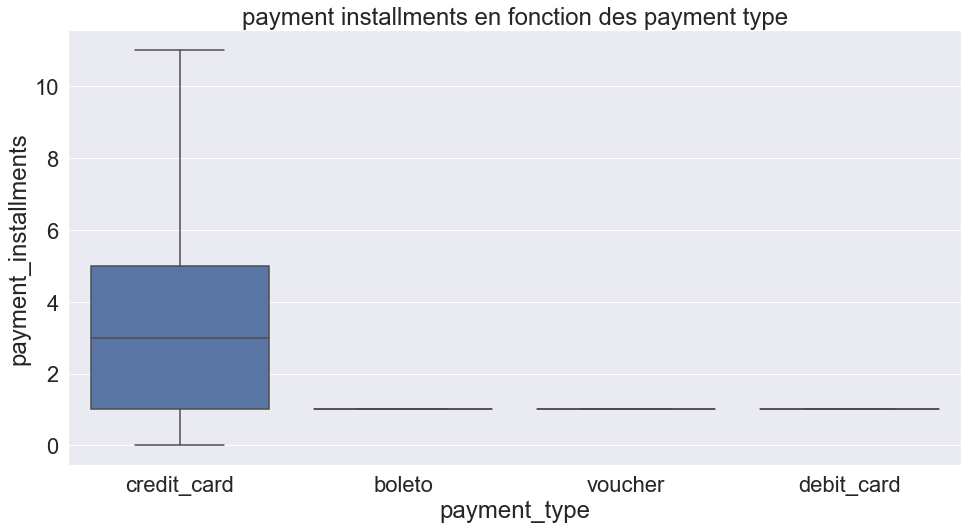

In [151]:
# Boxplot 
plt.figure(figsize=[16, 8])
plt.title("payment installments en fonction des payment type")
sns.boxplot(data=df_order_payments, y="payment_installments",
            x="payment_type", showfliers=False)
plt.show()

**Commentaires**
* Boleto, Voucher et Debit card ont 1 payments installements, c'est à dire que les paiements se font 1 seule fois
* Credit card semble est le seul type de payement fournisant la possibilité d'un payement installment

### Payment_sequential

Payment_sequential pourrait signifier que l'acheteur doit effectuer un paiement unique à la livraison du produit ou du service.

In [152]:
X = "payment_sequential"
Y = "payment_type"

In [153]:
df_order_payments.groupby(Y)[X].mean()

payment_type
boleto         1.000051
credit_card    1.004167
debit_card     1.034663
voucher        2.602424
Name: payment_sequential, dtype: float64

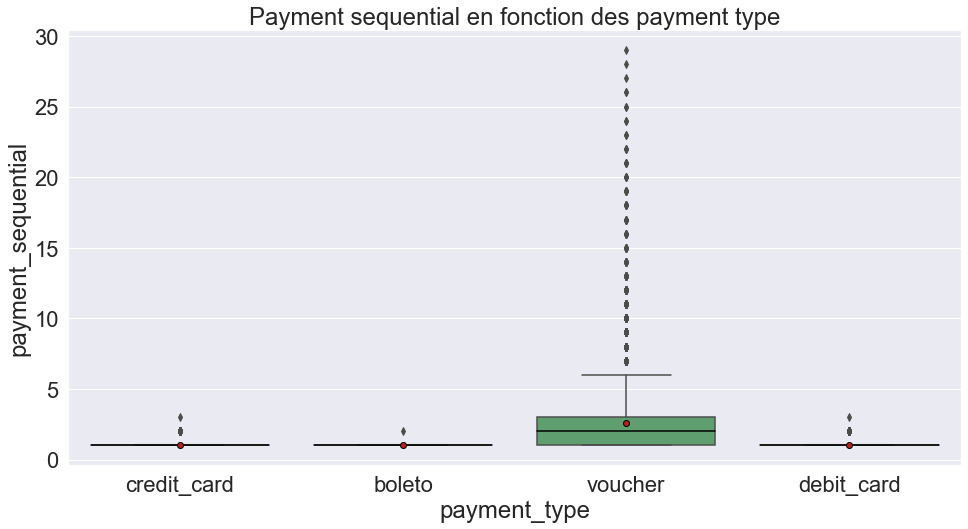

In [154]:
# Analyse graphique
medianprops = {'color': "black"}
meanprops = {'marker': 'o', 'markeredgecolor': 'black',
             'markerfacecolor': 'firebrick'}
plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(y=df_order_payments[X], x=df_order_payments[Y], showmeans=True, meanprops=meanprops,
            medianprops=medianprops).set(
    title='Payment sequential en fonction des payment type')
plt.show()

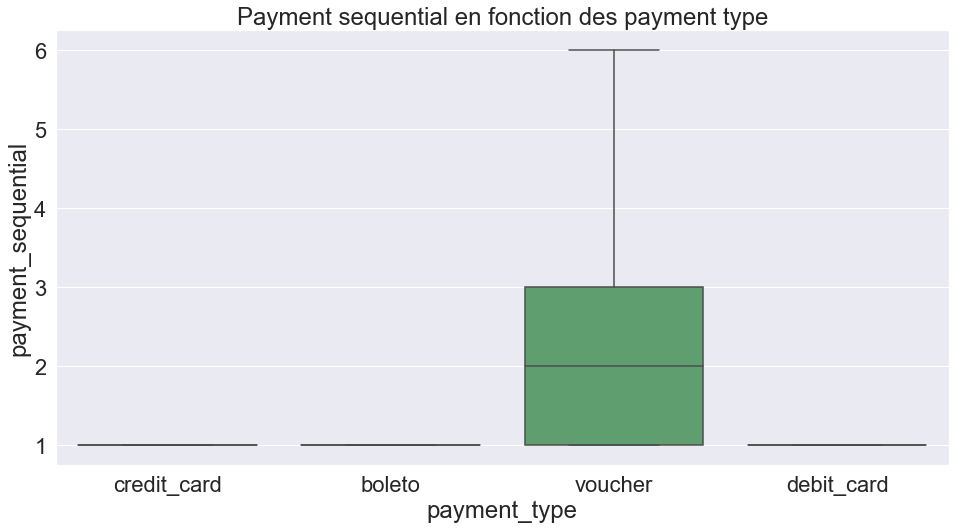

In [155]:
# Boxplot 
plt.figure(figsize=[16, 8])
plt.title("Payment sequential en fonction des payment type")
sns.boxplot(data=df_order_payments, y="payment_sequential",
            x="payment_type", showfliers=False)
plt.show()

**Commentaires**
* Le voucher represente le type de payment privilégié pour le payement sequentielle, c'est à dire le fait de payer en plusieurs


### Drop

In [156]:
df_order_payments.drop(
    ["payment_sequential", "payment_installments"], axis=1, inplace=True)

### Drop duplicated

In [157]:
df_order_payments = df_order_payments.drop_duplicates(keep='first')

## Products

In [158]:
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [159]:
df_products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [160]:
df_products.shape

(32951, 9)

### Missing value

In [161]:
#les total de data pour chaque feature et le pourcentage de missing value
total = df_products.isnull().sum().sort_values(ascending=False)
percent = (df_products.isnull().sum()/df_products.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
product_category_name,610,0.018512
product_name_lenght,610,0.018512
product_description_lenght,610,0.018512
product_photos_qty,610,0.018512
product_weight_g,2,0.000061
product_length_cm,2,0.000061
product_height_cm,2,0.000061
product_width_cm,2,0.000061
product_id,0,0.000000


In [162]:
df_products.drop(["product_name_lenght",
                 "product_description_lenght", "product_photos_qty"], axis=1, inplace=True)

### Drop Missing value product_category_name

In [163]:
df_products.dropna(subset=['product_category_name'], axis=0,inplace=True)

In [164]:
#les total de data pour chaque feature et le pourcentage de missing value
total = df_products.isnull().sum().sort_values(ascending=False)
percent = (df_products.isnull().sum()/df_products.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
product_weight_g,1,0.000031
product_length_cm,1,0.000031
product_height_cm,1,0.000031
product_width_cm,1,0.000031
product_id,0,0.000000
product_category_name,0,0.000000


### Imputation

### Volume Product

In [165]:
# volume = height*lenght*width
df_products["product_volume_cm3"] = df_products["product_length_cm"] \
    * df_products["product_height_cm"] \
    * df_products["product_width_cm"]

In [166]:
df_products.drop(["product_length_cm","product_height_cm","product_width_cm"],axis=1,inplace=True)

### Category_name_translation

In [167]:
df_product_category_name_translation['product_category_name'].nunique()

71

In [168]:
df_products['product_category_name'].nunique()

73

In [169]:
product_category_name = df_product_category_name_translation['product_category_name'].value_counts(
).index.tolist()

In [170]:
df_not_in_product_categorie = df_products[df_products['product_category_name'].isin(
    product_category_name) == False]

In [171]:
df_not_in_product_categorie['product_category_name'].value_counts()

portateis_cozinha_e_preparadores_de_alimentos    10
pc_gamer                                          3
Name: product_category_name, dtype: int64

In [172]:
# On ajoute ces deux product_categorie dans df_product_category_name_translation
new_rows = [{'product_category_name': 'portateis_cozinha_e_preparadores_de_alimentos'},
            {'product_category_name': 'pc_gamer'}]
df_product_category_name_translation = df_product_category_name_translation.append(
    new_rows, ignore_index=True)

### Merge

In [173]:
df_product = pd.merge(df_products, df_product_category_name_translation,
                      how='left', on=['product_category_name'])

### Replace

In [174]:
# missing values et traduction
df_product[df_product['product_category_name_english'].isna()==True]

,product_id,product_category_name,product_weight_g,product_volume_cm3,product_category_name_english
1581,0105b5323d24fc655f73052694dbbb3a,pc_gamer,2839.0,5472.0,NaN
5703,6fd83eb3e0799b775e4f946bd66657c0,portateis_cozinha_e_preparadores_de_alimentos,1200.0,20625.0,NaN
7176,5d923ead886c44b86845f69e50520c3e,portateis_cozinha_e_preparadores_de_alimentos,1200.0,20625.0,NaN
7326,6727051471a0fc4a0e7737b57bff2549,pc_gamer,650.0,7040.0,NaN
8648,bed164d9d628cf0593003389c535c6e0,portateis_cozinha_e_preparadores_de_alimentos,850.0,13860.0,NaN
10823,1220978a08a6b29a202bc015b18250e9,portateis_cozinha_e_preparadores_de_alimentos,1200.0,20625.0,NaN
13996,ae62bb0f95af63d64eae5f93dddea8d3,portateis_cozinha_e_preparadores_de_alimentos,10600.0,30400.0,NaN
15875,1954739d84629e7323a4295812a3e0ec,portateis_cozinha_e_preparadores_de_alimentos,750.0,27000.0,NaN
16609,dbe520fb381ad695a7e1f2807d20c765,pc_gamer,800.0,8712.0,NaN
17460,c7a3f1a7f9eef146cc499368b578b884,portateis_cozinha_e_preparadores_de_alimentos,7350.0,27600.0,NaN


In [175]:
df_product.loc[1581,'product_category_name_english'] = 'pc_gamer'
df_product.loc[7326,'product_category_name_english'] = 'pc_gamer'
df_product.loc[16609,'product_category_name_english'] = 'pc_gamer'

df_product.loc[5703,'product_category_name_english'] = 'kitchen_portables_and_food_preparators'
df_product.loc[7176,'product_category_name_english'] = 'kitchen_portables_and_food_preparators'
df_product.loc[8648,'product_category_name_english'] = 'kitchen_portables_and_food_preparators'
df_product.loc[10823,'product_category_name_english'] = 'kitchen_portables_and_food_preparators'
df_product.loc[13996,'product_category_name_english'] = 'kitchen_portables_and_food_preparators'
df_product.loc[15875,'product_category_name_english'] = 'kitchen_portables_and_food_preparators'
df_product.loc[17460,'product_category_name_english'] = 'kitchen_portables_and_food_preparators'
df_product.loc[18252,'product_category_name_english'] = 'kitchen_portables_and_food_preparators'
df_product.loc[26398,'product_category_name_english'] = 'kitchen_portables_and_food_preparators'
df_product.loc[29370,'product_category_name_english'] = 'kitchen_portables_and_food_preparators'

### Drop

In [176]:
df_product.drop(['product_category_name'],axis=1,inplace=True)

## Sellers

In [177]:
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [178]:
df_sellers.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [179]:
df_sellers.shape

(3095, 4)

### Seller_city

In [180]:
print(f"Il y a un total de {len(df_sellers['seller_city'].value_counts())} de villes vendeurs")

Il y a un total de 611 de villes vendeurs


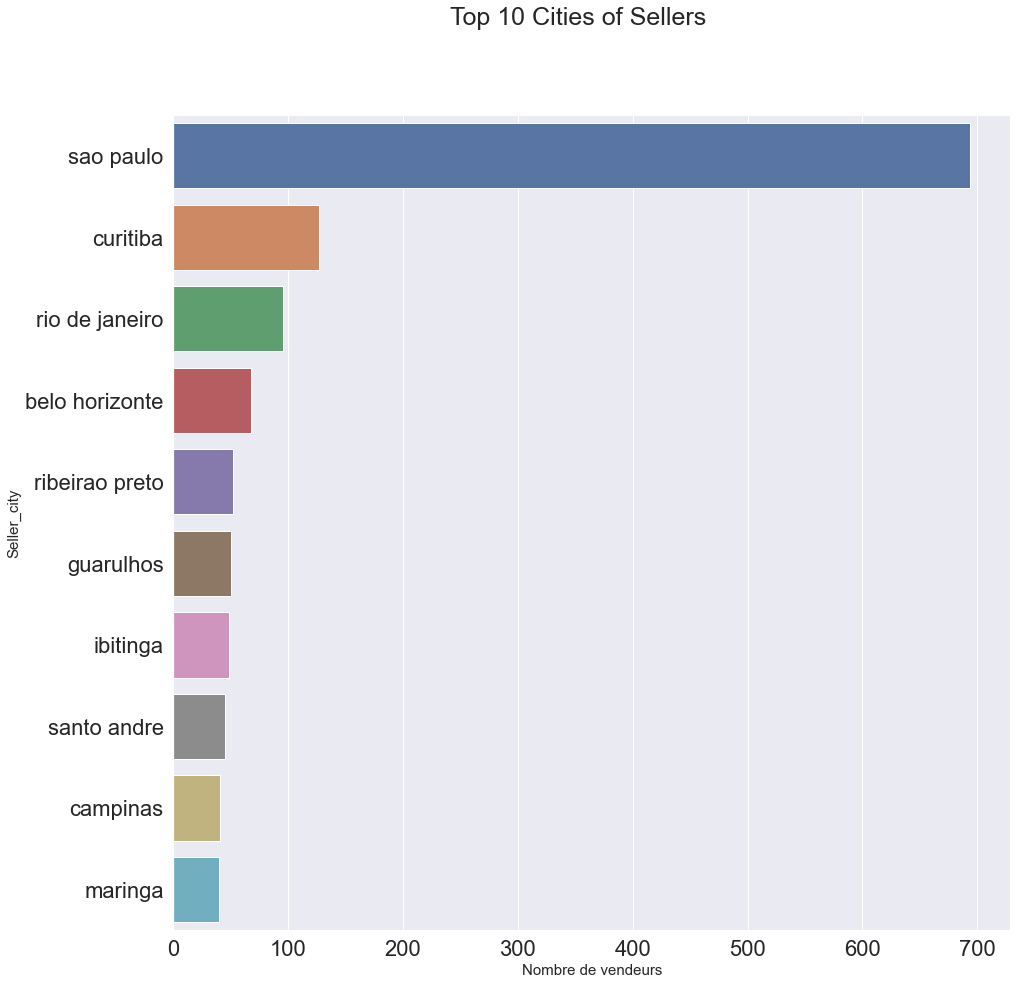

In [181]:
plt.figure(figsize=(15, 15))
sns.countplot(y=df_sellers['seller_city'], data=df_sellers,
              order=df_sellers['seller_city'].value_counts().iloc[:10].index)
plt.suptitle("Top 10 Cities of Sellers", fontsize=25)
plt.xlabel("Nombre de vendeurs", fontsize=15)
plt.ylabel('Seller_city', fontsize=15)
plt.show()

### Seller_state

In [182]:
print(f"Il y a un total de {len(df_sellers['seller_state'].value_counts())} d'Etat vendeurs")

Il y a un total de 23 d'Etat vendeurs


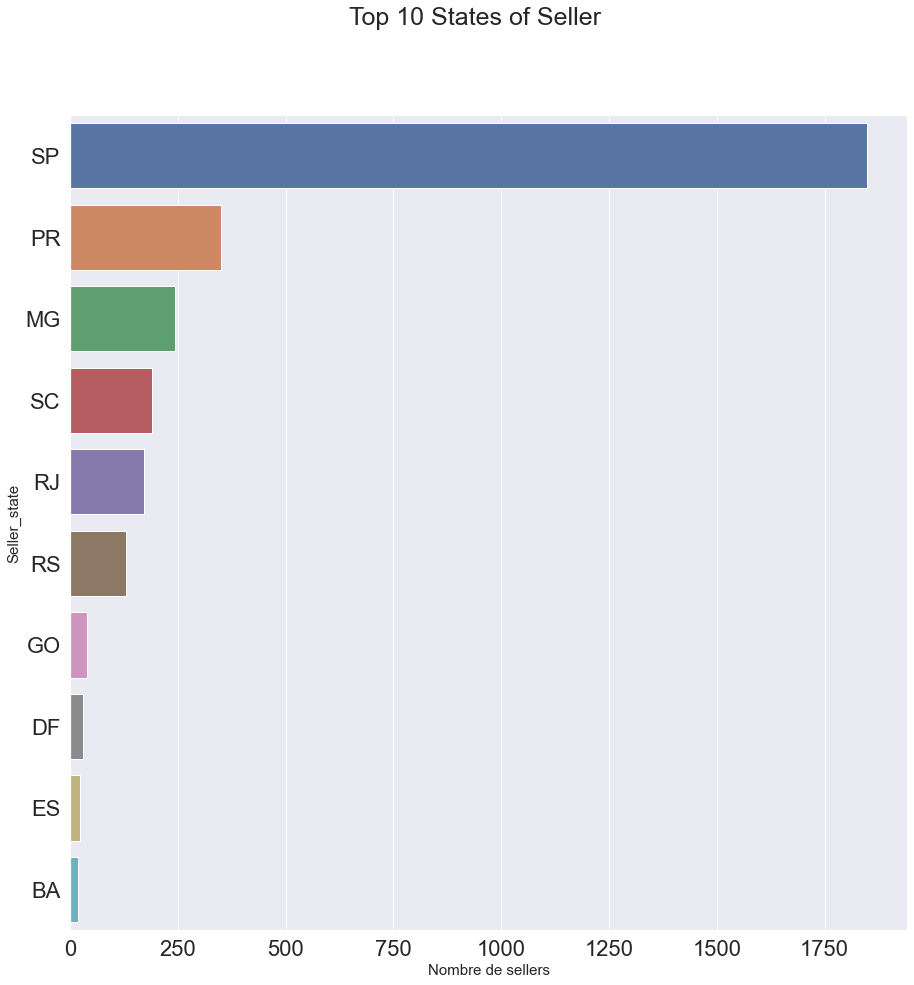

In [183]:
plt.figure(figsize=(15, 15))
sns.countplot(y=df_sellers['seller_state'], data=df_sellers,
              order=df_sellers['seller_state'].value_counts().iloc[:10].index)
plt.suptitle("Top 10 States of Seller", fontsize=25)
plt.xlabel("Nombre de sellers", fontsize=15)
plt.ylabel('Seller_state', fontsize=15)
plt.show()

### Brazil Zip code

In [184]:
# isin brazil zip code
df_sellers = df_sellers[df_sellers['seller_zip_code_prefix'].isin(
    brazil_zip_code)]

### Drop Features

In [185]:
df_sellers.drop(['seller_city', 'seller_state'], axis=1, inplace=True)

# Regroupement des dataframes

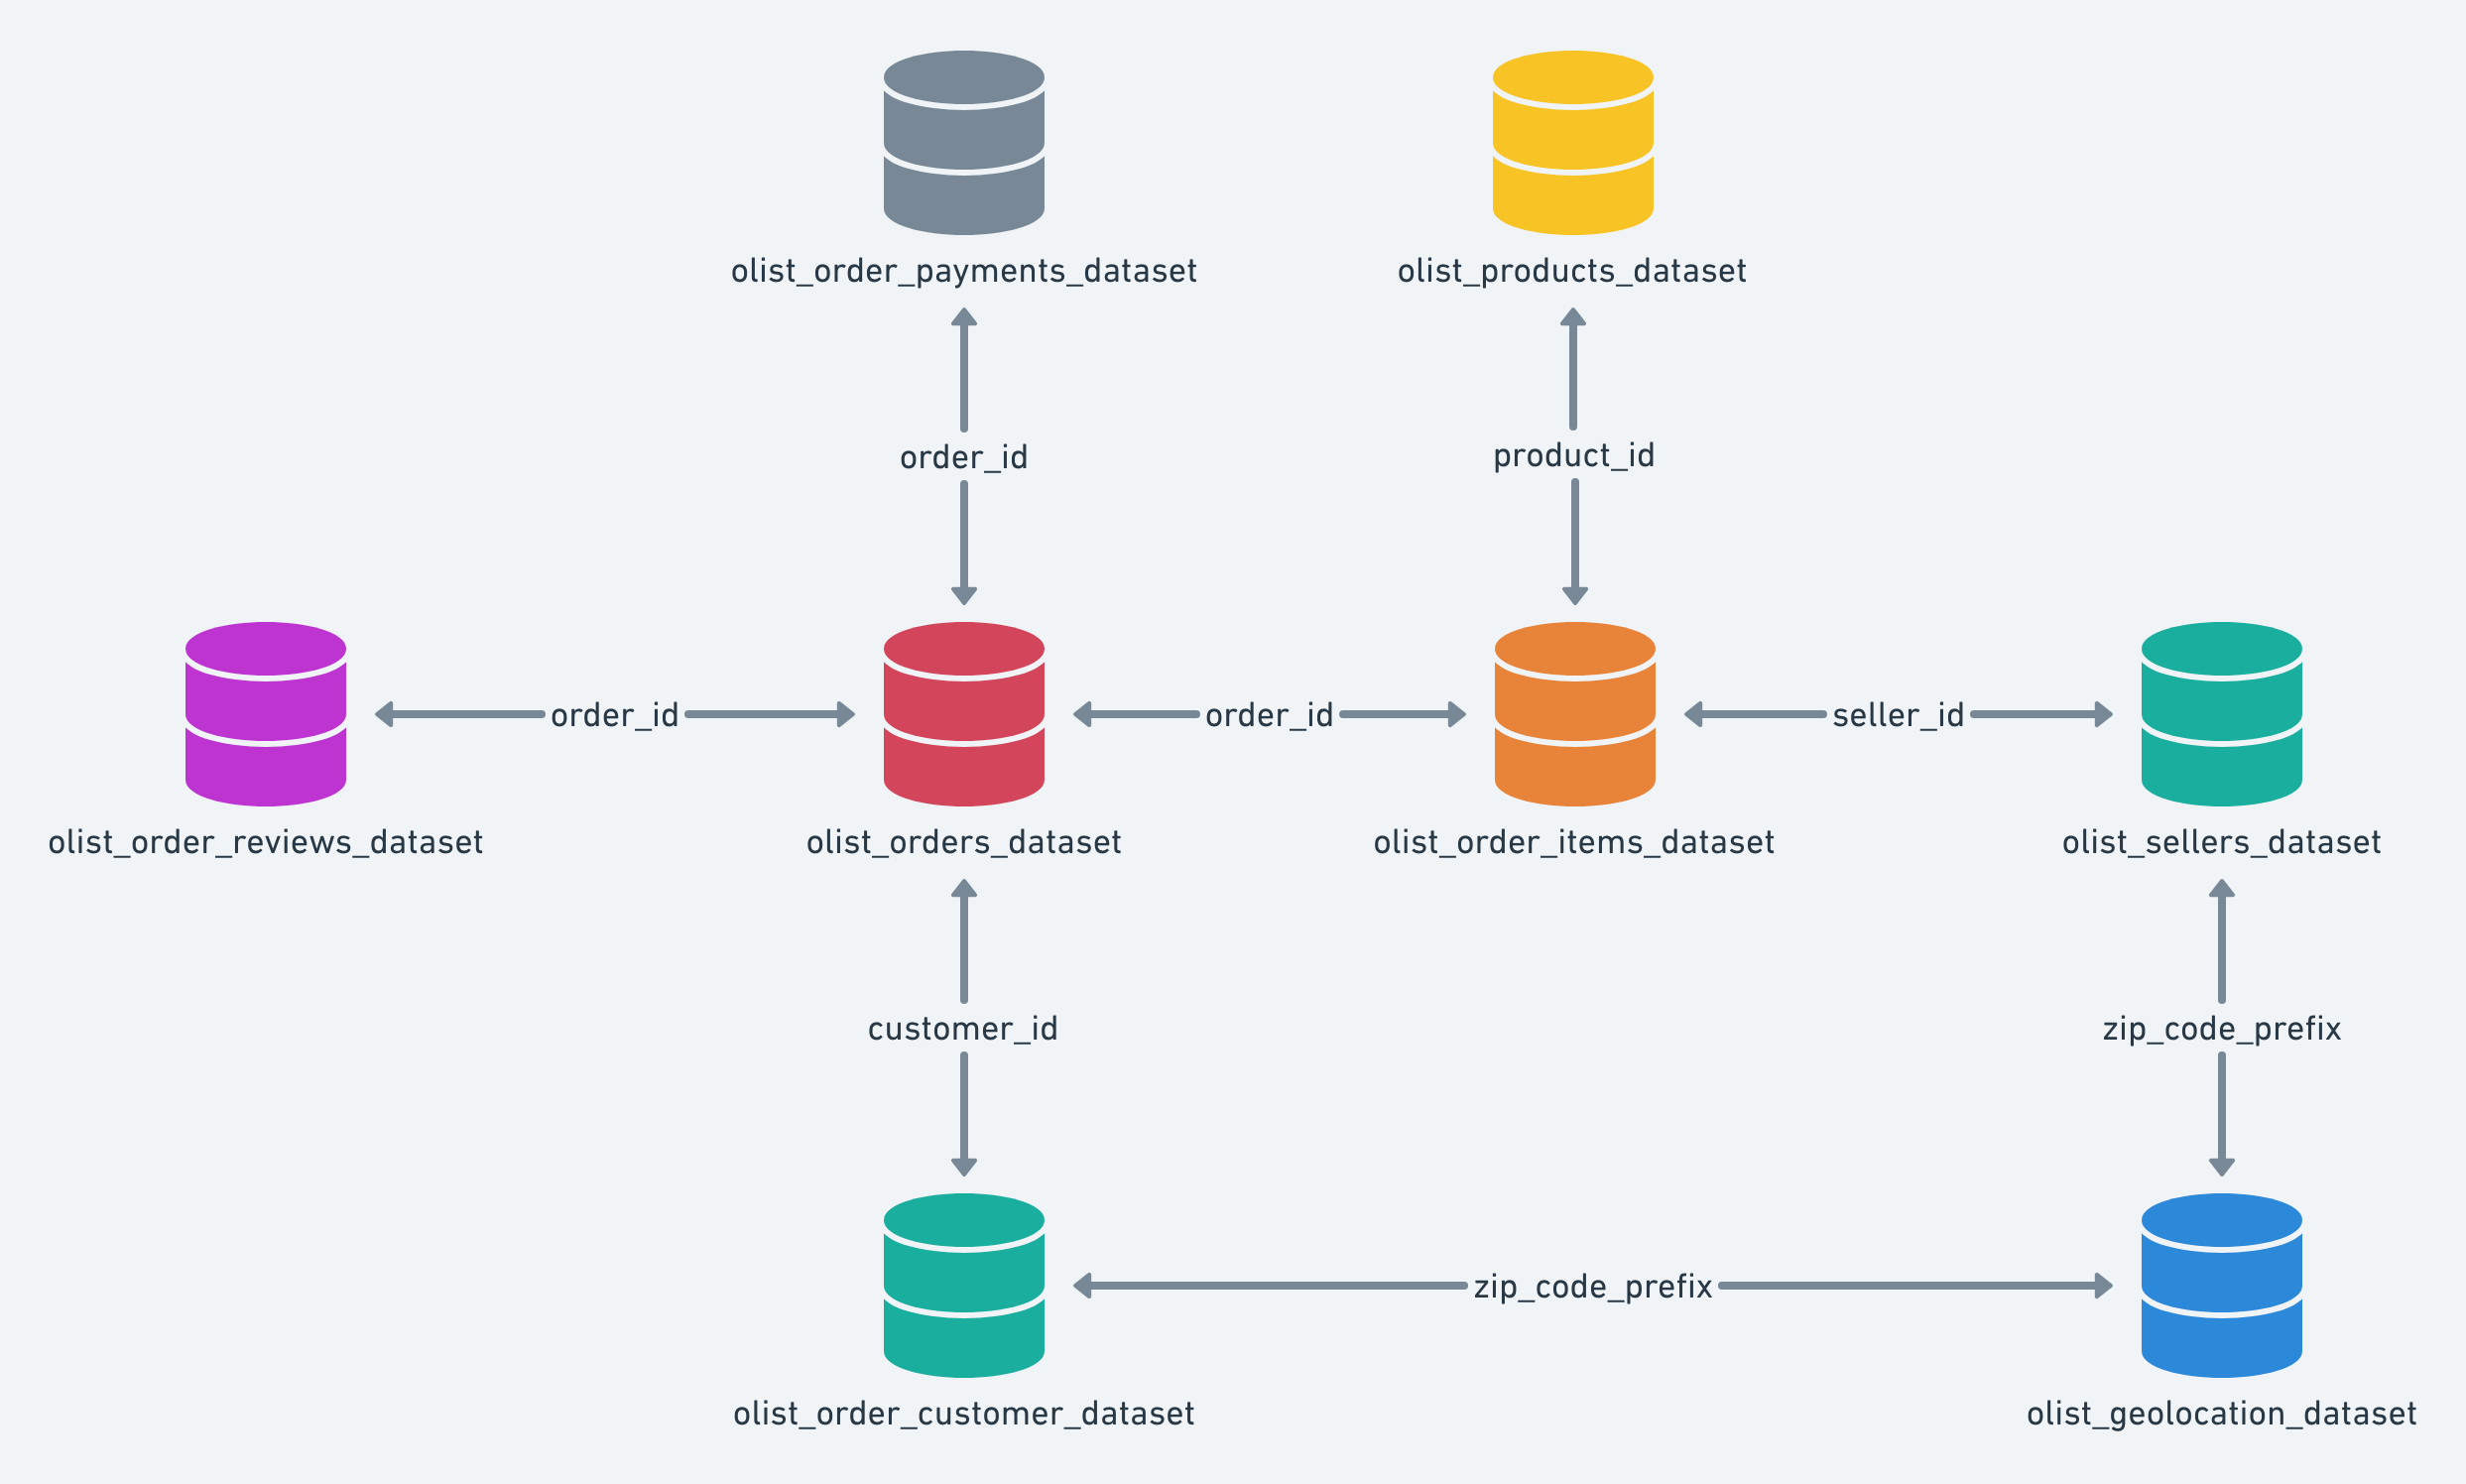

In [186]:
noms_df = ['df_sellers',
           'df_customers',
           'df_orders',
           'df_order_items',
           'df_order_reviews',
           'df_products',
           'df_order_payments',
           'df_geo']

liste_df = [df_sellers,
            df_customers,
            df_orders,
            df_order_items,
            df_order_reviews,
            df_products,
            df_order_payments,
            df_geo]

In [187]:
i = 0
for df in liste_df:
    print("**** Nom du fichier: ", noms_df[i])
    print("************************************")
    i = i + 1
    print("Variables    : ", df.columns)
    print("Nb de features : ", df.shape[1])
    print("Nb de rows   : ", df.shape[0])
    print("Doublons     : ", df.duplicated().sum())
    print("Nb de NaN: ", df.isna().sum().sum(), 'NaN\n')

**** Nom du fichier:  df_sellers
************************************
Variables    :  Index(['seller_id', 'seller_zip_code_prefix'], dtype='object')
Nb de features :  2
Nb de rows   :  3088
Doublons     :  0
Nb de NaN:  0 NaN

**** Nom du fichier:  df_customers
************************************
Variables    :  Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix'], dtype='object')
Nb de features :  3
Nb de rows   :  99157
Doublons     :  0
Nb de NaN:  0 NaN

**** Nom du fichier:  df_orders
************************************
Variables    :  Index(['order_id', 'customer_id', 'temps_session', 'experience_client',
       'temps_livraison_estime'],
      dtype='object')
Nb de features :  5
Nb de rows   :  95395
Doublons     :  0
Nb de NaN:  0 NaN

**** Nom du fichier:  df_order_items
************************************
Variables    :  Index(['order_id', 'order_item_id', 'product_id', 'seller_id', 'benefice'], dtype='object')
Nb de features :  5
Nb de rows   :  108961


In [188]:
# Renommage d'une colonne de sellers
df_sellers["geolocation_zip_code_prefix"] = df_sellers["seller_zip_code_prefix"]

In [189]:
# Fusion dataframe sellers et geo
df_sellers = pd.merge(df_sellers, df_geo, how="left",on=["geolocation_zip_code_prefix"])

In [190]:
# Suppression de la colonne 'geolocation_zip_code_prefix'
df_sellers.drop(columns=["geolocation_zip_code_prefix"],axis=1,inplace=True)

In [191]:
# Fusion dataframe orders items
df_orders = pd.merge(df_orders, df_order_items, how='left', on=['order_id'])

In [192]:
df_orders

,order_id,customer_id,temps_session,experience_client,temps_livraison_estime,order_item_id,product_id,seller_id,benefice
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,0 days 00:10:42,8 days 10:28:40,15 days 12:52:45,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,21.27
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,1 days 06:42:50,13 days 18:46:08,17 days 20:35:33,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,95.94
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,0 days 00:16:34,9 days 09:27:40,26 days 15:04:37,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,140.68
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,0 days 00:17:53,13 days 05:00:36,26 days 04:14:01,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,17.80
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,0 days 01:01:50,2 days 20:58:23,12 days 01:39:31,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,11.18
...,...,...,...,...,...,...,...,...,...
108957,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,0 days 00:11:39,22 days 04:38:58,23 days 10:49:23,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,154.80
108958,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,0 days 00:17:33,24 days 20:37:34,30 days 08:55:44,1.0,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,140.97
108959,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,0 days 00:07:54,17 days 02:04:27,37 days 02:23:39,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,139.40
108960,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,0 days 00:07:54,17 days 02:04:27,37 days 02:23:39,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,139.40


In [193]:
# Fusion dataframe orders payments
df_orders = pd.merge(df_orders, df_order_payments, how='left', on=['order_id'])

In [194]:
df_orders

,order_id,customer_id,temps_session,experience_client,temps_livraison_estime,order_item_id,product_id,seller_id,benefice,payment_type,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,0 days 00:10:42,8 days 10:28:40,15 days 12:52:45,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,21.27,credit_card,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,0 days 00:10:42,8 days 10:28:40,15 days 12:52:45,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,21.27,voucher,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,0 days 00:10:42,8 days 10:28:40,15 days 12:52:45,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,21.27,voucher,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,1 days 06:42:50,13 days 18:46:08,17 days 20:35:33,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,95.94,boleto,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,0 days 00:16:34,9 days 09:27:40,26 days 15:04:37,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,140.68,credit_card,179.12
...,...,...,...,...,...,...,...,...,...,...,...
113084,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,0 days 00:11:39,22 days 04:38:58,23 days 10:49:23,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,154.80,credit_card,195.00
113085,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,0 days 00:17:33,24 days 20:37:34,30 days 08:55:44,1.0,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,140.97,credit_card,271.01
113086,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,0 days 00:07:54,17 days 02:04:27,37 days 02:23:39,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,139.40,credit_card,441.16
113087,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,0 days 00:07:54,17 days 02:04:27,37 days 02:23:39,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,139.40,credit_card,441.16


In [195]:
# Renommage d'une colonne de custumers
df_geo["customer_zip_code_prefix"] = df_geo["geolocation_zip_code_prefix"]

In [196]:
# Fusion des données clients avec les données géographiques
df_customers = pd.merge(df_customers, df_geo, how='left',on=["customer_zip_code_prefix"])

In [197]:
df_customers

,customer_id,customer_unique_id,customer_zip_code_prefix,geolocation_zip_code_prefix,geometry
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,14409,POINT (-47.3978655 -20.509897499999997)
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,14409,POINT (-47.39924094190359 -20.497396193014072)
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,14409,POINT (-47.39955309167686 -20.51045862987575)
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,14409,POINT (-47.39416132556492 -20.480940023267937)
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,14409,POINT (-47.39819363894111 -20.51541329065829)
...,...,...,...,...,...
10069181,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,6703,POINT (-46.9045823469329 -23.59809158174156)
10069182,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,6703,POINT (-46.90809068234524 -23.59417052203266)
10069183,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,6703,POINT (-46.905602658058775 -23.599368922009347)
10069184,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,6703,POINT (-46.89201393581588 -23.584424908163488)


In [198]:
# Suppression de la colonne 'geolocation_zip_code_prefix'
df_customers.drop(
    columns=["geolocation_zip_code_prefix"], axis=1, inplace=True)

In [199]:
# Fusion dataframe df_order et df_customers
df_orders = pd.merge(df_orders, df_customers, how="left",on=["customer_id"])

In [200]:
df_orders

,order_id,customer_id,temps_session,experience_client,temps_livraison_estime,order_item_id,product_id,seller_id,benefice,payment_type,payment_value,customer_unique_id,customer_zip_code_prefix,geometry
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,0 days 00:10:42,8 days 10:28:40,15 days 12:52:45,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,21.27,credit_card,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,POINT (-46.587471259651394 -23.57480921065843)
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,0 days 00:10:42,8 days 10:28:40,15 days 12:52:45,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,21.27,credit_card,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,POINT (-46.587122588770185 -23.578333244308777)
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,0 days 00:10:42,8 days 10:28:40,15 days 12:52:45,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,21.27,credit_card,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,POINT (-46.58745087621902 -23.575033372468116)
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,0 days 00:10:42,8 days 10:28:40,15 days 12:52:45,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,21.27,credit_card,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,POINT (-46.58667299999999 -23.580054000000004)
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,0 days 00:10:42,8 days 10:28:40,15 days 12:52:45,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,21.27,credit_card,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,POINT (-46.58727586558455 -23.57628116493396)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11562574,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,0 days 14:22:58,7 days 16:11:00,24 days 12:39:32,1.0,006619bbed68b000c8ba3f8725d5409e,ececbfcff9804a2d6b40f589df8eef2b,50.14,debit_card,86.86,60350aa974b26ff12caad89e55993bd6,83750,POINT (-49.73015553025663 -25.760604663147568)
11562575,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,0 days 14:22:58,7 days 16:11:00,24 days 12:39:32,1.0,006619bbed68b000c8ba3f8725d5409e,ececbfcff9804a2d6b40f589df8eef2b,50.14,debit_card,86.86,60350aa974b26ff12caad89e55993bd6,83750,POINT (-49.72031290173205 -25.762064492641144)
11562576,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,0 days 14:22:58,7 days 16:11:00,24 days 12:39:32,1.0,006619bbed68b000c8ba3f8725d5409e,ececbfcff9804a2d6b40f589df8eef2b,50.14,debit_card,86.86,60350aa974b26ff12caad89e55993bd6,83750,POINT (-49.72217665479925 -25.75855053734977)
11562577,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,0 days 14:22:58,7 days 16:11:00,24 days 12:39:32,1.0,006619bbed68b000c8ba3f8725d5409e,ececbfcff9804a2d6b40f589df8eef2b,50.14,debit_card,86.86,60350aa974b26ff12caad89e55993bd6,83750,POINT (-49.73753335487311 -25.77421833009996)


In [201]:
# Fusion dataframe orders items et df_product
df_products = pd.merge(df_order_items, df_products, how='left',on=["product_id"])

In [202]:
df_products

,order_id,order_item_id,product_id,seller_id,benefice,product_category_name,product_weight_g,product_volume_cm3
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,45.61,cool_stuff,650.0,3528.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,219.97,pet_shop,30000.0,60000.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,181.13,moveis_decoracao,3050.0,14157.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,0.20,perfumaria,200.0,2400.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,181.76,ferramentas_jardim,3750.0,42000.0
...,...,...,...,...,...,...,...,...
108956,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,256.58,utilidades_domesticas,10150.0,53400.0
108957,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,313.47,informatica_acessorios,8950.0,44460.0
108958,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,82.95,esporte_lazer,967.0,9576.0
108959,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,47.27,informatica_acessorios,100.0,8000.0


In [203]:
# Fusion des orders et des produts par la colonne 'order_id'
df = pd.merge(df_orders, df_products, how='left', on=["order_id"])

,Total,Percent
product_volume_cm3,200509,0.012333
product_weight_g,200509,0.012333
product_category_name,200436,0.012329
benefice_y,77,0.000005
order_item_id_x,77,0.000005
product_id_x,77,0.000005
seller_id_x,77,0.000005
benefice_x,77,0.000005
seller_id_y,77,0.000005
product_id_y,77,0.000005


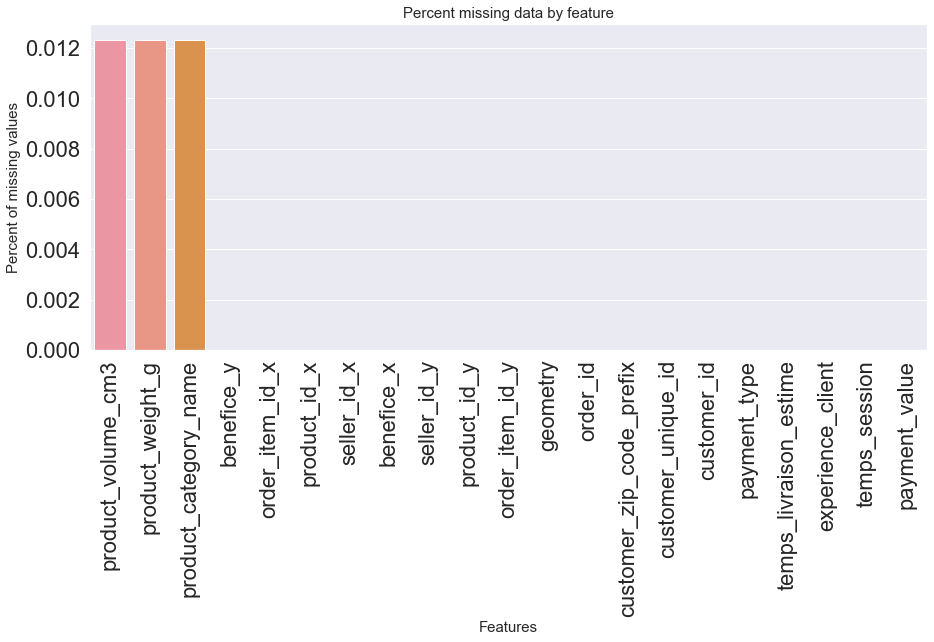

In [204]:
#les total de data pour chaque feature et le pourcentage de missing value
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data

In [205]:
df.duplicated().sum()

0